# 6.0 Results

In [142]:
# Basic Operations
import pandas as pd
import numpy as np

# Data Visualization
from matplotlib import cm
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.inspection import permutation_importance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

## 6.1 K-Fold Cross Validation Scores of Data Augmentation and Feature Sets

### Original Dataset | Feature Set 1 | Xr | 132 Features

In [257]:
raw_data = pd.read_csv("data/training-set-2/pose_data_raw.csv")
raw_data['label'] = raw_data['pose_name'].str.replace('-lft', '').str.replace('-rgt', '')
labels, uniques = pd.factorize(raw_data['label'])
raw_data['label_encoded'] = labels
Xr = raw_data.iloc[:,2:134]
yr = raw_data['label'].values

Xr

landmark_00_x  landmark_00_y  landmark_00_z  landmark_00_v  \
0         0.545408       0.259078      -0.407526       0.998032   
1         0.436167       0.272993       0.042864       0.994189   
2         0.504749       0.180154      -0.839282       0.999996   
3         0.499891       0.180474      -0.591090       0.999997   
4         0.450799       0.341594      -0.282800       0.999512   
..             ...            ...            ...            ...   
535       0.506111       0.534306      -0.154565       0.999970   
536       0.750999       0.265975       0.050217       1.000000   
537       0.254569       0.253966       0.185102       0.999985   
538       0.356109       0.269642      -0.166786       0.999335   
539       0.644864       0.268925      -0.251831       0.998788   

     landmark_01_x  landmark_01_y  landmark_01_z  landmark_01_v  \
0         0.529543       0.271390      -0.377108       0.997484   
1         0.451747       0.284805       0.008824       0.993863   
2         0.512618       0.166645      -0.803643       0.999990   
3         0.509142       0.168015      -0.550916       0.999988   
4         0.444959       0.327051      -0.349440       0.999634   
..             ...            ...            ...            ...   
535       0.509519       0.520750      -0.135237       0.999945   
536       0.734617       0.252835       0.082880       1.000000   
537       0.276668       0.244936       0.168699       0.999988   
538       0.358961       0.250586      -0.201648       0.998349   
539       0.640746       0.248651      -0.221982       0.995351   

     landmark_02_x  landmark_02_y  ...  landmark_30_z  landmark_30_v  \
0         0.529986       0.275081  ...      -0.279319       0.921783   
1         0.451169       0.287267  ...       0.386870       0.028072   
2         0.519943       0.166195  ...       0.039491       0.902986   
3         0.516657       0.167906  ...      -0.077581       0.926418   
4         0.447544       0.325720  ...       0.380551       0.849768   
..             ...            ...  ...            ...            ...   
535       0.513895       0.519983  ...      -0.187706       0.993354   
536       0.731955       0.253481  ...       0.004372       0.953845   
537       0.281481       0.246480  ...       0.462144       0.196382   
538       0.362701       0.249192  ...       0.351428       0.970817   
539       0.637616       0.247503  ...       0.080691       0.839644   

     landmark_31_x  landmark_31_y  landmark_31_z  landmark_31_v  \
0         0.178496       0.687856       0.396094       0.143073   
1         0.829540       0.681655      -0.259552       0.234634   
2         0.393930       0.802434      -0.269182       0.987534   
3         0.508029       0.777915       0.064188       0.965189   
4         0.548799       0.843092      -0.280939       0.903217   
..             ...            ...            ...            ...   
535       0.924881       0.402281      -0.304024       0.996291   
536       0.225413       0.414827       0.473995       0.646005   
537       0.693174       0.359902      -0.068871       0.595498   
538       0.805866       0.250624       0.061751       0.957399   
539       0.542495       0.863337       0.246485       0.965350   

     landmark_32_x  landmark_32_y  landmark_32_z  landmark_32_v  
0         0.165575       0.687296      -0.299426       0.903340  
1         0.822786       0.687349       0.296422       0.010969  
2         0.492710       0.779056      -0.184242       0.970091  
3         0.594786       0.795155      -0.319720       0.984336  
4         0.313885       0.762152       0.190190       0.823446  
..             ...            ...            ...            ...  
535       0.101837       0.413196      -0.236651       0.989679  
536       0.272044       0.336316       0.049254       0.949220  
537       0.770825       0.392072       0.434250       0.176225  
538       0.446802       0.869190       0.317473       0.962696  

### Improved Augmented Dataset | Feature Set 2 | Xa | 126 Features

In [269]:
aug_data = pd.read_csv("data/training-set-2/pose_data_res.csv")
Xa = aug_data.iloc[:,4:]
ya = aug_data['label'].values
poses = aug_data['label'].values

Xa

landmark_00_x  landmark_00_y  landmark_00_z  landmark_01_x  \
0           0.545408       0.740922      -0.407526       0.529543   
1           0.607888       0.740922      -0.306625       0.586982   
2           0.651898       0.740922      -0.196408       0.626586   
3           0.676100       0.740922      -0.080224       0.647152   
4           0.679759       0.740922       0.038399       0.648054   
...              ...            ...            ...            ...   
19435       0.221597       0.731075      -0.655868       0.241815   
19436       0.332121       0.731075      -0.607424       0.348152   
19437       0.432553       0.731075      -0.540524       0.443911   
19438       0.519843       0.731075      -0.457200       0.526182   
19439       0.591337       0.731075      -0.359984       0.592465   

       landmark_01_y  landmark_01_z  landmark_02_x  landmark_02_y  \
0           0.728610      -0.377108       0.529986       0.724919   
1           0.728610      -0.279425       0.587520       0.724919   
2           0.728610      -0.173252       0.627202       0.724919   
3           0.728610      -0.061814       0.647827       0.724919   
4           0.728610       0.051502       0.648768       0.724919   
...              ...            ...            ...            ...   
19435       0.751349      -0.633527       0.239539       0.752497   
19436       0.751349      -0.581912       0.345533       0.752497   
19437       0.751349      -0.512615       0.441028       0.752497   
19438       0.751349      -0.427743       0.523123       0.752497   
19439       0.751349      -0.329874       0.589323       0.752497   

       landmark_02_z  landmark_03_x  ...  d_elbows  d_knees  d_ankles  \
0          -0.377690       0.530451  ...    0.7512   0.7316    0.7640   
1          -0.279921       0.587934  ...    0.7512   0.7316    0.7640   
2          -0.173647       0.627552  ...    0.7512   0.7316    0.7640   
3          -0.062097       0.648103  ...    0.7512   0.7316    0.7640   
4           0.051341       0.648962  ...    0.7512   0.7316    0.7640   
...              ...            ...  ...       ...      ...       ...   
19435      -0.631352       0.237434  ...    0.6759   0.5520    0.6271   
19436      -0.580165       0.343013  ...    0.6759   0.5520    0.6271   
19437      -0.511350       0.438171  ...    0.6759   0.5520    0.6271   
19438      -0.426997       0.520014  ...    0.6759   0.5520    0.6271   
19439      -0.329671       0.586058  ...    0.6759   0.5520    0.6271   

       a_nose_to_rgt_shoulder  a_nose_to_lft_shoulder  a_mid_hip_to_knees  \
0                    121.4334                 58.5666            115.3067   
1                    121.4334                 58.5666            115.3067   
2                    121.4334                 58.5666            115.3067   
3                    121.4334                 58.5666            115.3067   
4                    121.4334                 58.5666            115.3067   
...                       ...                     ...                 ...   
19435                116.5380                 63.4620            154.1874   
19436                116.5380                 63.4620            154.1874   
19437                116.5380                 63.4620            154.1874   
19438                116.5380                 63.4620            154.1874   
19439                116.5380                 63.4620            154.1874   

       a_lft_shoulder_to_wrist  a_lft_hip_to_ankle  a_rgt_shoulder_to_wrist  \
0                      70.4993             92.0094                  86.8382   
1                      70.4993             92.0094                  86.8382   
2                      70.4993             92.0094                  86.8382   
3                      70.4993             92.0094                  86.8382   
4                      70.4993             92.0094                  86.8382   
...                        ...                 ...                      .

### Improved Augmented Dataset | Feature Set 3 | Xs | 66 Features

Reduced redundunt or seemingly irrelevant features

In [268]:
Xs = pd.concat([aug_data.iloc[:, 4:7], aug_data.iloc[:, 37:55], aug_data.iloc[:, 73:91], aug_data.iloc[:, 103:]],axis=1)
Xs

landmark_00_x  landmark_00_y  landmark_00_z  landmark_11_x  \
0           0.545408       0.740922      -0.407526       0.668044   
1           0.607888       0.740922      -0.306625       0.651476   
2           0.651898       0.740922      -0.196408       0.615113   
3           0.676100       0.740922      -0.080224       0.560061   
4           0.679759       0.740922       0.038399       0.487991   
...              ...            ...            ...            ...   
19435       0.221597       0.731075      -0.655868       0.402962   
19436       0.332121       0.731075      -0.607424       0.461952   
19437       0.432553       0.731075      -0.540524       0.506906   
19438       0.519843       0.731075      -0.457200       0.536457   
19439       0.591337       0.731075      -0.359984       0.549709   

       landmark_11_y  landmark_11_z  landmark_12_x  landmark_12_y  \
0           0.660940       0.036965       0.646923       0.670012   
1           0.660940       0.152408       0.758311       0.670012   
2           0.660940       0.263220       0.846658       0.670012   
3           0.660940       0.366034       0.909279       0.670012   
4           0.660940       0.457727       0.944273       0.670012   
...              ...            ...            ...            ...   
19435       0.681036      -0.374963      -0.005541       0.721055   
19436       0.681036      -0.299293       0.111196       0.721055   
19437       0.681036      -0.214529       0.224554       0.721055   
19438       0.681036      -0.123247       0.331089       0.721055   
19439       0.681036      -0.028219       0.427565       0.721055   

       landmark_12_z  landmark_13_x  ...  d_elbows  d_knees  d_ankles  \
0          -0.698056       0.757197  ...    0.7512   0.7316    0.7640   
1          -0.575114       0.739991  ...    0.7512   0.7316    0.7640   
2          -0.434697       0.700301  ...    0.7512   0.7316    0.7640   
3          -0.281073       0.639332  ...    0.7512   0.7316    0.7640   
4          -0.118908       0.558938  ...    0.7512   0.7316    0.7640   
...              ...            ...  ...       ...      ...       ...   
19435      -0.671776       0.420130  ...    0.6759   0.5520    0.6271   
19436      -0.662532       0.460604  ...    0.6759   0.5520    0.6271   
19437      -0.633158       0.487082  ...    0.6759   0.5520    0.6271   
19438      -0.584545       0.498761  ...    0.6759   0.5520    0.6271   
19439      -0.518172       0.495285  ...    0.6759   0.5520    0.6271   

       a_nose_to_rgt_shoulder  a_nose_to_lft_shoulder  a_mid_hip_to_knees  \
0                    121.4334                 58.5666            115.3067   
1                    121.4334                 58.5666            115.3067   
2                    121.4334                 58.5666            115.3067   
3                    121.4334                 58.5666            115.3067   
4                    121.4334                 58.5666            115.3067   
...                       ...                     ...                 ...   
19435                116.5380                 63.4620            154.1874   
19436                116.5380                 63.4620            154.1874   
19437                116.5380                 63.4620            154.1874   
19438                116.5380                 63.4620            154.1874   
19439                116.5380                 63.4620            154.1874   

       a_lft_shoulder_to_wrist  a_lft_hip_to_ankle  a_rgt_shoulder_to_wrist  \
0                      70.4993             92.0094                  86.8382   
1                      70.4993             92.0094                  86.8382   
2                      70.4993             92.0094                  86.8382   
3                      70.4993             92.0094                  86.8382   
4                      70.4993             92.0094                  86.8382   
...                        ...                 ...                      .

### Improved Augmented Dataset | Feature Set 4 | Xf | 27 Features

Only retaining the nose landmark and all feature creations

In [302]:
Xf = aug_data.iloc[:, 103:]
Xf

head_x    head_y    head_z   chest_x   chest_y   chest_z  stomach_x  \
0      0.542394  0.723463 -0.401906  0.657483  0.665476 -0.330546   0.667835   
1      0.603944  0.723463 -0.301614  0.704893  0.665476 -0.211353   0.686395   
2      0.647143  0.723463 -0.192158  0.730886  0.665476 -0.085739   0.684098   
3      0.670680  0.723463 -0.076864  0.734670  0.665476  0.042481   0.661015   
4      0.673838  0.723463  0.040766  0.716132  0.665476  0.169410   0.617848   
...         ...       ...       ...       ...       ...       ...        ...   
19435  0.215708  0.745179 -0.642808  0.198711  0.701046 -0.523370   0.221355   
19436  0.324053  0.745179 -0.595585  0.286574  0.701046 -0.480913   0.288699   
19437  0.422552  0.745179 -0.530266  0.365730  0.701046 -0.423844   0.347270   
19438  0.508212  0.745179 -0.448834  0.433773  0.701046 -0.353896   0.395290   
19439  0.578431  0.745179 -0.353765  0.488637  0.701046 -0.273196   0.431300   

       stomach_y  stomach_z     hip_x  ...  d_elbows  d_knees  d_ankles  \
0       0.529027  -0.165306  0.678187  ...    0.7512   0.7316    0.7640   
1       0.529027  -0.046826  0.667896  ...    0.7512   0.7316    0.7640   
2       0.529027   0.073077  0.637310  ...    0.7512   0.7316    0.7640   
3       0.529027   0.190759  0.587360  ...    0.7512   0.7316    0.7640   
4       0.529027   0.302645  0.519564  ...    0.7512   0.7316    0.7640   
...          ...        ...       ...  ...       ...      ...       ...   
19435   0.601460  -0.407183  0.243999  ...    0.6759   0.5520    0.6271   
19436   0.601460  -0.362559  0.290823  ...    0.6759   0.5520    0.6271   
19437   0.601460  -0.306919  0.328811  ...    0.6759   0.5520    0.6271   
19438   0.601460  -0.241953  0.356807  ...    0.6759   0.5520    0.6271   
19439   0.601460  -0.169636  0.373963  ...    0.6759   0.5520    0.6271   

       a_nose_to_rgt_shoulder  a_nose_to_lft_shoulder  a_mid_hip_to_knees  \
0                    121.4334                 58.5666            115.3067   
1                    121.4334                 58.5666            115.3067   
2                    121.4334                 58.5666            115.3067   
3                    121.4334                 58.5666            115.3067   
4                    121.4334                 58.5666            115.3067   
...                       ...                     ...                 ...   
19435                116.5380                 63.4620            154.1874   
19436                116.5380                 63.4620            154.1874   
19437                116.5380                 63.4620            154.1874   
19438                116.5380                 63.4620            154.1874   
19439                116.5380                 63.4620            154.1874   

       a_lft_shoulder_to_wrist  a_lft_hip_to_ankle  a_rgt_shoulder_to_wrist  \
0                      70.4993             92.0094                  86.8382   
1                      70.4993             92.0094                  86.8382   
2                      70.4993             92.0094                  86.8382   
3                      70.4993             92.0094                  86.8382   
4                      70.4993             92.0094                  86.8382   
...                        ...                 ...                      ...   
19435                 159.0989             59.3940                  98.2172   
19436                 159.0989             59.3940                  98.2172   
19437                 159.0989             59.3940                  98.2172   
19438                 159.0989             59.3940                  98.2172   
19439                 159.0989             59.3940                  98.2172   

       a_rgt_hip_to_ankle  
0                110.0583  
1                110.0583  
2                110.0583  
3                110.0583  
4                110.0583  
...                   ...  
19435            120.2231  
19436            120.2231  
19437            120.

In [306]:
Xc = aug_data.iloc[:, 115:]
Xc

d_nose_to_rgt_knee  d_nose_to_lft_knee  d_rgt_shoulder_to_ankle  \
0                  0.9433              0.5582                   0.5728   
1                  0.9433              0.5582                   0.5728   
2                  0.9433              0.5582                   0.5728   
3                  0.9433              0.5582                   0.5728   
4                  0.9433              0.5582                   0.5728   
...                   ...                 ...                      ...   
19435              0.5363              0.5571                   0.2878   
19436              0.5363              0.5571                   0.2878   
19437              0.5363              0.5571                   0.2878   
19438              0.5363              0.5571                   0.2878   
19439              0.5363              0.5571                   0.2878   

       d_lft_shoulder_to_ankle  d_wrists  d_elbows  d_knees  d_ankles  \
0                       0.5985    0.4396    0.7512   0.7316    0.7640   
1                       0.5985    0.4396    0.7512   0.7316    0.7640   
2                       0.5985    0.4396    0.7512   0.7316    0.7640   
3                       0.5985    0.4396    0.7512   0.7316    0.7640   
4                       0.5985    0.4396    0.7512   0.7316    0.7640   
...                        ...       ...       ...      ...       ...   
19435                   0.4810    0.6598    0.6759   0.5520    0.6271   
19436                   0.4810    0.6598    0.6759   0.5520    0.6271   
19437                   0.4810    0.6598    0.6759   0.5520    0.6271   
19438                   0.4810    0.6598    0.6759   0.5520    0.6271   
19439                   0.4810    0.6598    0.6759   0.5520    0.6271   

       a_nose_to_rgt_shoulder  a_nose_to_lft_shoulder  a_mid_hip_to_knees  \
0                    121.4334                 58.5666            115.3067   
1                    121.4334                 58.5666            115.3067   
2                    121.4334                 58.5666            115.3067   
3                    121.4334                 58.5666            115.3067   
4                    121.4334                 58.5666            115.3067   
...                       ...                     ...                 ...   
19435                116.5380                 63.4620            154.1874   
19436                116.5380                 63.4620            154.1874   
19437                116.5380                 63.4620            154.1874   
19438                116.5380                 63.4620            154.1874   
19439                116.5380                 63.4620            154.1874   

       a_lft_shoulder_to_wrist  a_lft_hip_to_ankle  a_rgt_shoulder_to_wrist  \
0                      70.4993             92.0094                  86.8382   
1                      70.4993             92.0094                  86.8382   
2                      70.4993             92.0094                  86.8382   
3                      70.4993             92.0094                  86.8382   
4                      70.4993             92.0094                  86.8382   
...                        ...                 ...                      ...   
19435                 159.0989             59.3940                  98.2172   
19436                 159.0989             59.3940                  98.2172   
19437                 159.0989             59.3940                  98.2172   
19438                 159.0989             59.3940                  98.2172   
19439                 159.0989             59.3940                  98.2172   

       a_rgt_hip_to_ankle  
0                110.0583  
1                110.0583  
2                110.0583  
3                110.0583  
4                110.0583  
...                   ...  
19435            120.2231  
19436            120.2231  
19437            120.2231  
19438            120.2231  
19439            120.2231  

[19440 rows x 15 columns]

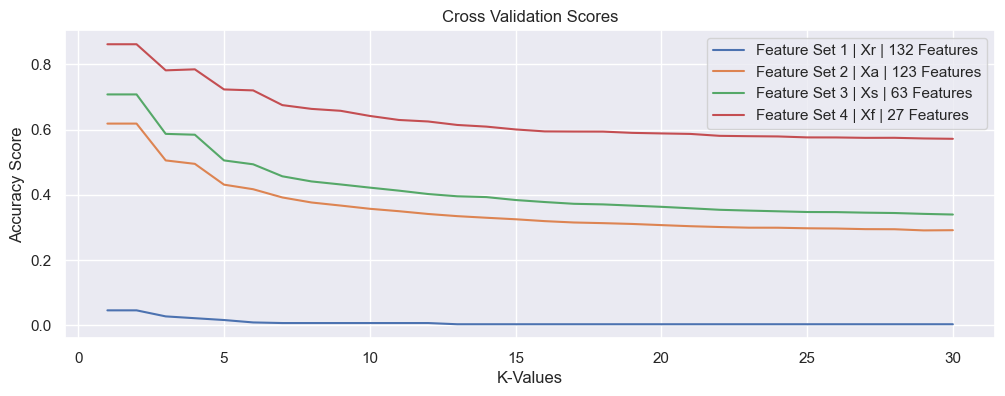

In [272]:
scaler = StandardScaler()
Xr_scaled = scaler.fit_transform(Xr)
Xa_scaled = scaler.fit_transform(Xa)
Xs_scaled = scaler.fit_transform(Xs)
Xf_scaled = scaler.fit_transform(Xf)

k_values = [i for i in range(1, 31)]

scores_Xr = []
scores_Xa = []
scores_Xs = []
scores_Xf = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean', weights='distance')
    
    knn.fit(Xr_scaled, yr)
    score_Xr = cross_val_score(knn, Xr_scaled, yr, cv=LeaveOneOut(), scoring='accuracy')
    scores_Xr.append(np.mean(score_Xr))
    
    knn.fit(Xa_scaled, ya)
    score_Xa = cross_val_score(knn, Xa_scaled, ya, cv=6, scoring='accuracy')
    scores_Xa.append(np.mean(score_Xa))

    knn.fit(Xs_scaled, ya)
    score_Xs = cross_val_score(knn, Xs_scaled, ya, cv=6, scoring='accuracy')
    scores_Xs.append(np.mean(score_Xs))

    knn.fit(Xf_scaled, ya)
    score_Xf = cross_val_score(knn, Xf_scaled, ya, cv=6, scoring='accuracy')
    scores_Xf.append(np.mean(score_Xf))

sns.set(rc={'figure.figsize':(12,4)})
sns.lineplot(x = k_values, y = scores_Xr, label='Feature Set 1 | Xr | 132 Features')
sns.lineplot(x = k_values, y = scores_Xa, label='Feature Set 2 | Xa | 123 Features')
sns.lineplot(x = k_values, y = scores_Xs, label='Feature Set 3 | Xs | 63 Features')
sns.lineplot(x = k_values, y = scores_Xf, label='Feature Set 4 | Xf | 27 Features')
plt.title("Cross Validation Scores")
plt.xlabel('K-Values')
plt.ylabel('Accuracy Score')
plt.show()

In [273]:
idx_max_Xr = np.argmax(scores_Xr)
optimal_k_Xr = k_values[idx_max_Xr]
max_accuracy_Xr = scores_Xr[idx_max_Xr]

idx_max_Xa = np.argmax(scores_Xa)
optimal_k_Xa = k_values[idx_max_Xa]
max_accuracy_Xa = scores_Xa[idx_max_Xa]

idx_max_Xs = np.argmax(scores_Xs)
optimal_k_Xs = k_values[idx_max_Xs]
max_accuracy_Xs = scores_Xs[idx_max_Xs]

idx_max_Xf = np.argmax(scores_Xf)
optimal_k_Xf = k_values[idx_max_Xf]
max_accuracy_Xf = scores_Xf[idx_max_Xf]

print(f"Optimal K (Xr): {optimal_k_Xr} - Maximum Accuracy: {max_accuracy_Xr:.4f}")
print(f"Optimal K (Xa): {optimal_k_Xa} - Maximum Accuracy: {max_accuracy_Xa:.4f}")
print(f"Optimal K (Xs): {optimal_k_Xs} - Maximum Accuracy: {max_accuracy_Xs:.4f}")
print(f"Optimal K (Xf): {optimal_k_Xf} - Maximum Accuracy: {max_accuracy_Xf:.4f}")

Optimal K (Xr): 1 - Maximum Accuracy: 0.0463
Optimal K (Xa): 1 - Maximum Accuracy: 0.6184
Optimal K (Xs): 1 - Maximum Accuracy: 0.7077
Optimal K (Xf): 1 - Maximum Accuracy: 0.8614


## 6.2 Principal Component Analysis

In [275]:
Xr_pca = PCA(n_components=len(Xr.columns))
Xr_pca.fit_transform(Xr)
Xr_var = np.cumsum(np.round(Xr_pca.explained_variance_ratio_,decimals=3)*100)

Xa_pca = PCA(n_components=len(Xa.columns))
Xa_pca.fit_transform(Xa)
Xa_var = np.cumsum(np.round(Xa_pca.explained_variance_ratio_,decimals=3)*100)

Xs_pca = PCA(n_components=len(Xs.columns))
Xs_pca.fit_transform(Xs)
Xs_var = np.cumsum(np.round(Xs_pca.explained_variance_ratio_,decimals=3)*100)

Xf_pca = PCA(n_components=len(Xf.columns))
Xf_pca.fit_transform(Xf)
Xf_var = np.cumsum(np.round(Xf_pca.explained_variance_ratio_,decimals=3)*100)

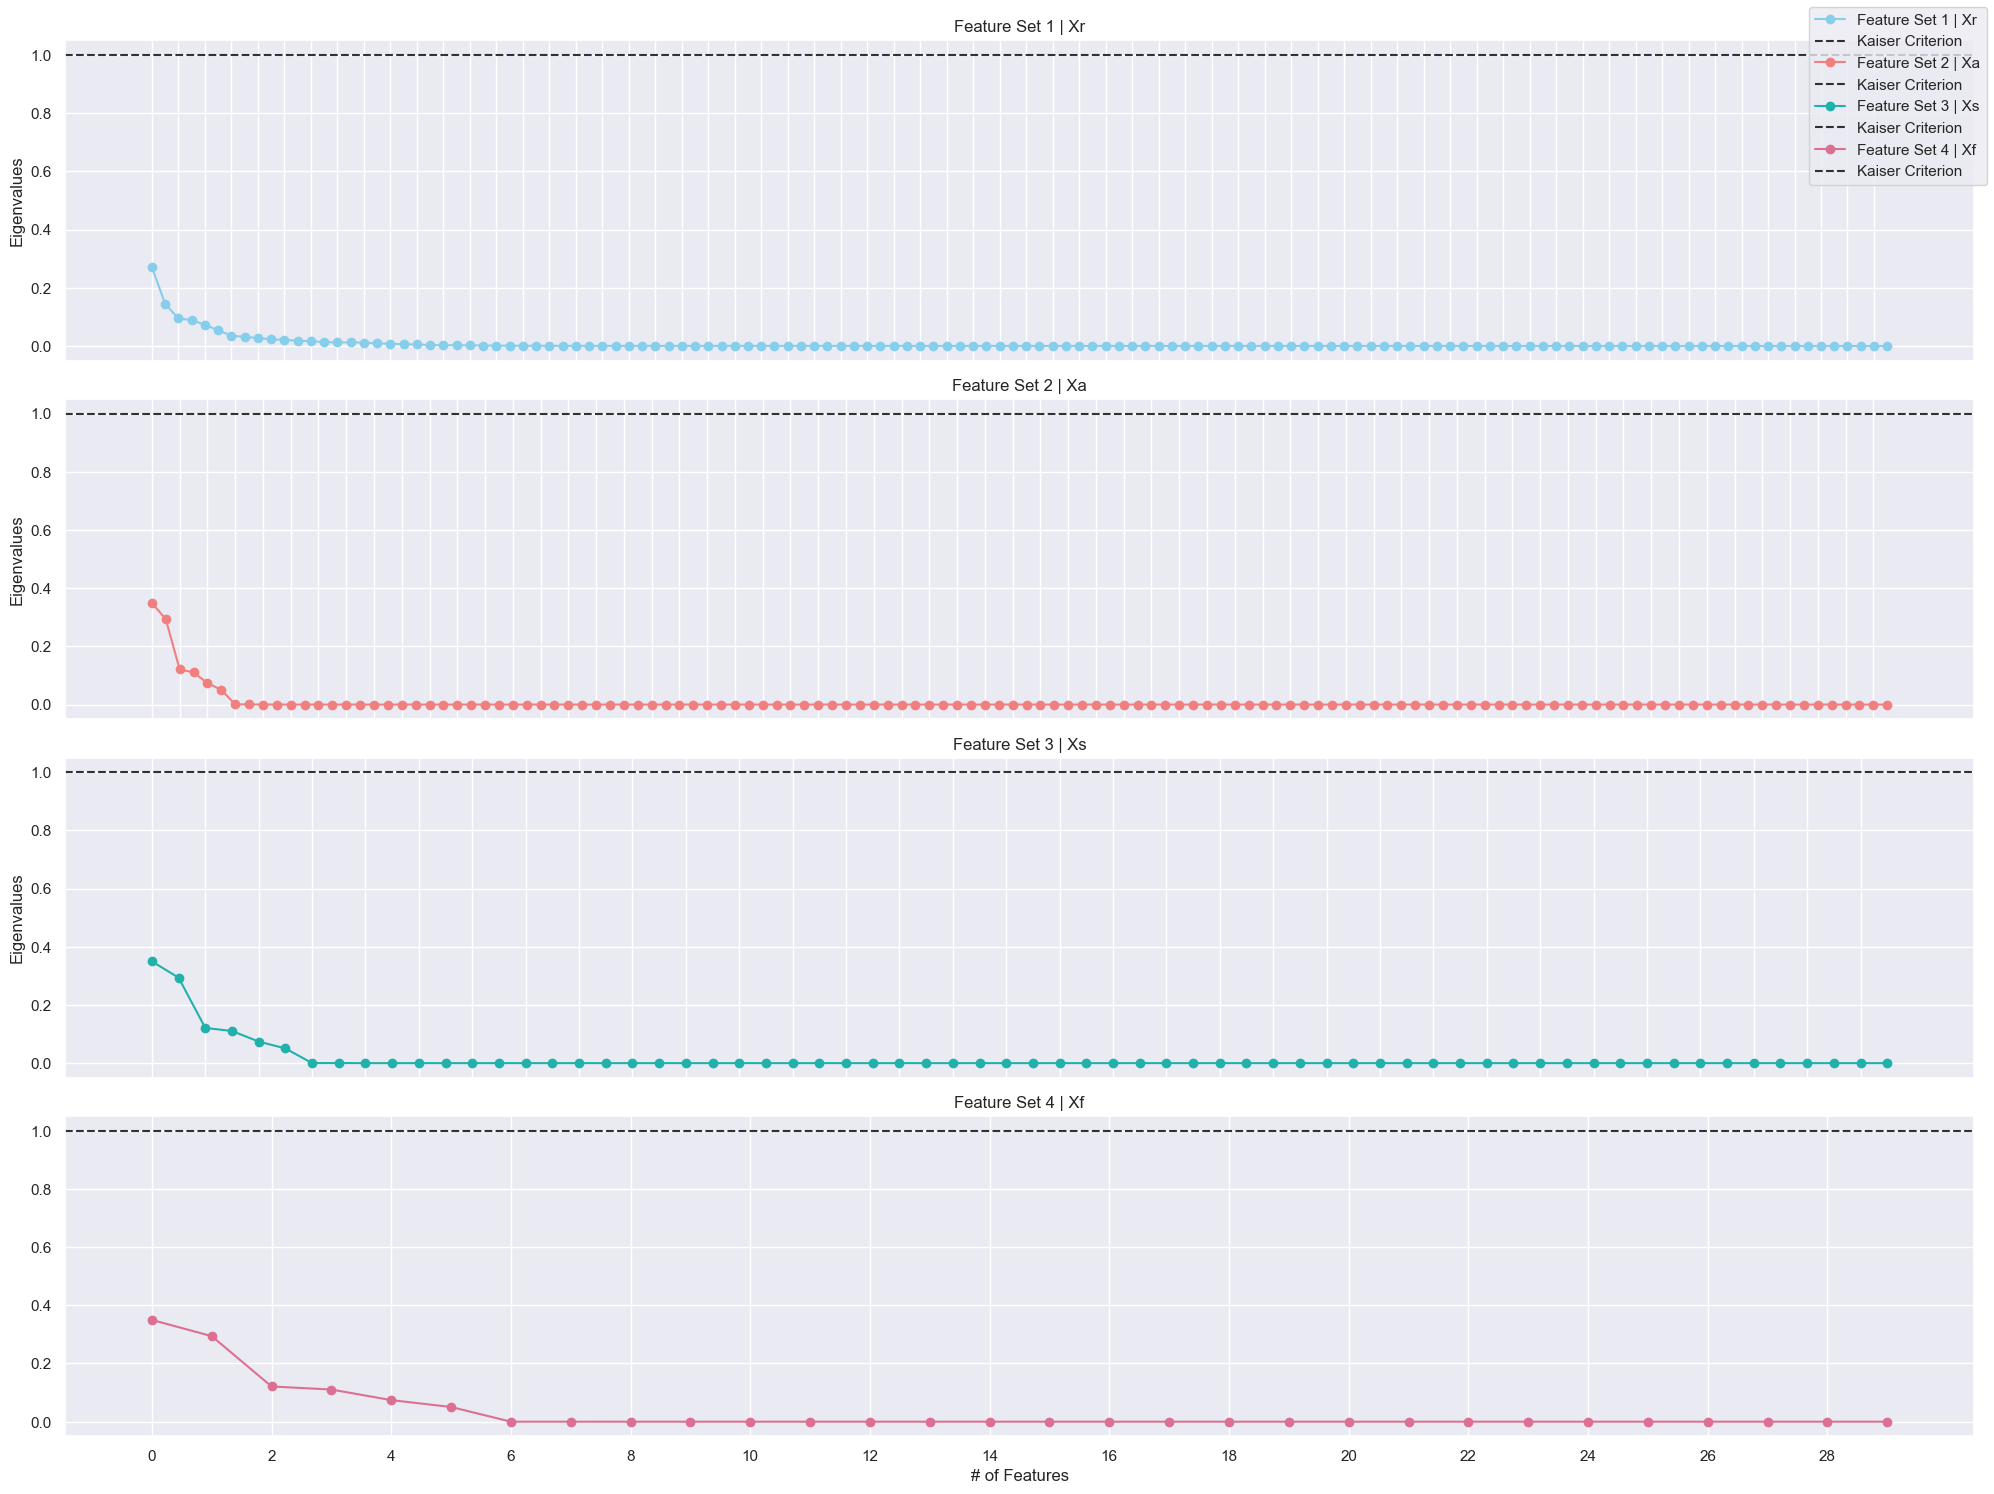

In [276]:
fig, axs = plt.subplots(4, figsize=(20, 15))

# Feature Set 1 | Xr
axs[0].plot(Xr_pca.explained_variance_ratio_, marker='o', label='Feature Set 1 | Xr', color='skyblue')
axs[0].set_title('Feature Set 1 | Xr')
axs[0].axhline(y=1, color='black', alpha=0.8, linestyle='--', label='Kaiser Criterion')
axs[0].grid(True)
axs[0].set_xlabel("# of Features")
axs[0].set_ylabel("Eigenvalues")
axs[0].set_xticks(np.arange(0, len(Xr_var), step=2))

# Feature Set 2 | Xa
axs[1].plot(Xa_pca.explained_variance_ratio_, marker='o', label='Feature Set 2 | Xa', color='lightcoral')
axs[1].set_title('Feature Set 2 | Xa')
axs[1].axhline(y=1, color='black', alpha=0.8, linestyle='--', label='Kaiser Criterion')
axs[1].grid(True)
axs[1].set_xlabel("# of Features")
axs[1].set_ylabel("Eigenvalues")
axs[1].set_xticks(np.arange(0, len(Xa_var), step=2))

# Feature Set 3 | Xs
axs[2].plot(Xs_pca.explained_variance_ratio_, marker='o', label='Feature Set 3 | Xs', color='lightseagreen')
axs[2].set_title('Feature Set 3 | Xs')
axs[2].axhline(y=1, color='black', alpha=0.8, linestyle='--', label='Kaiser Criterion')
axs[2].grid(True)
axs[2].set_xlabel("# of Features")
axs[2].set_ylabel("Eigenvalues")
axs[2].set_xticks(np.arange(0, len(Xs_var), step=2))

# Feature Set 4 | Xf
axs[3].plot(Xf_pca.explained_variance_ratio_, marker='o', label='Feature Set 4 | Xf', color='palevioletred')
axs[3].set_title('Feature Set 4 | Xf')
axs[3].axhline(y=1, color='black', alpha=0.8, linestyle='--', label='Kaiser Criterion')
axs[3].grid(True)
axs[3].set_xlabel("# of Features")
axs[0].set_ylabel("Eigenvalues")
axs[3].set_xticks(np.arange(0, len(Xf_var), step=2))

for ax in axs.flat:
    ax.label_outer()

fig.legend(loc='upper right')
plt.tight_layout()
plt.show()

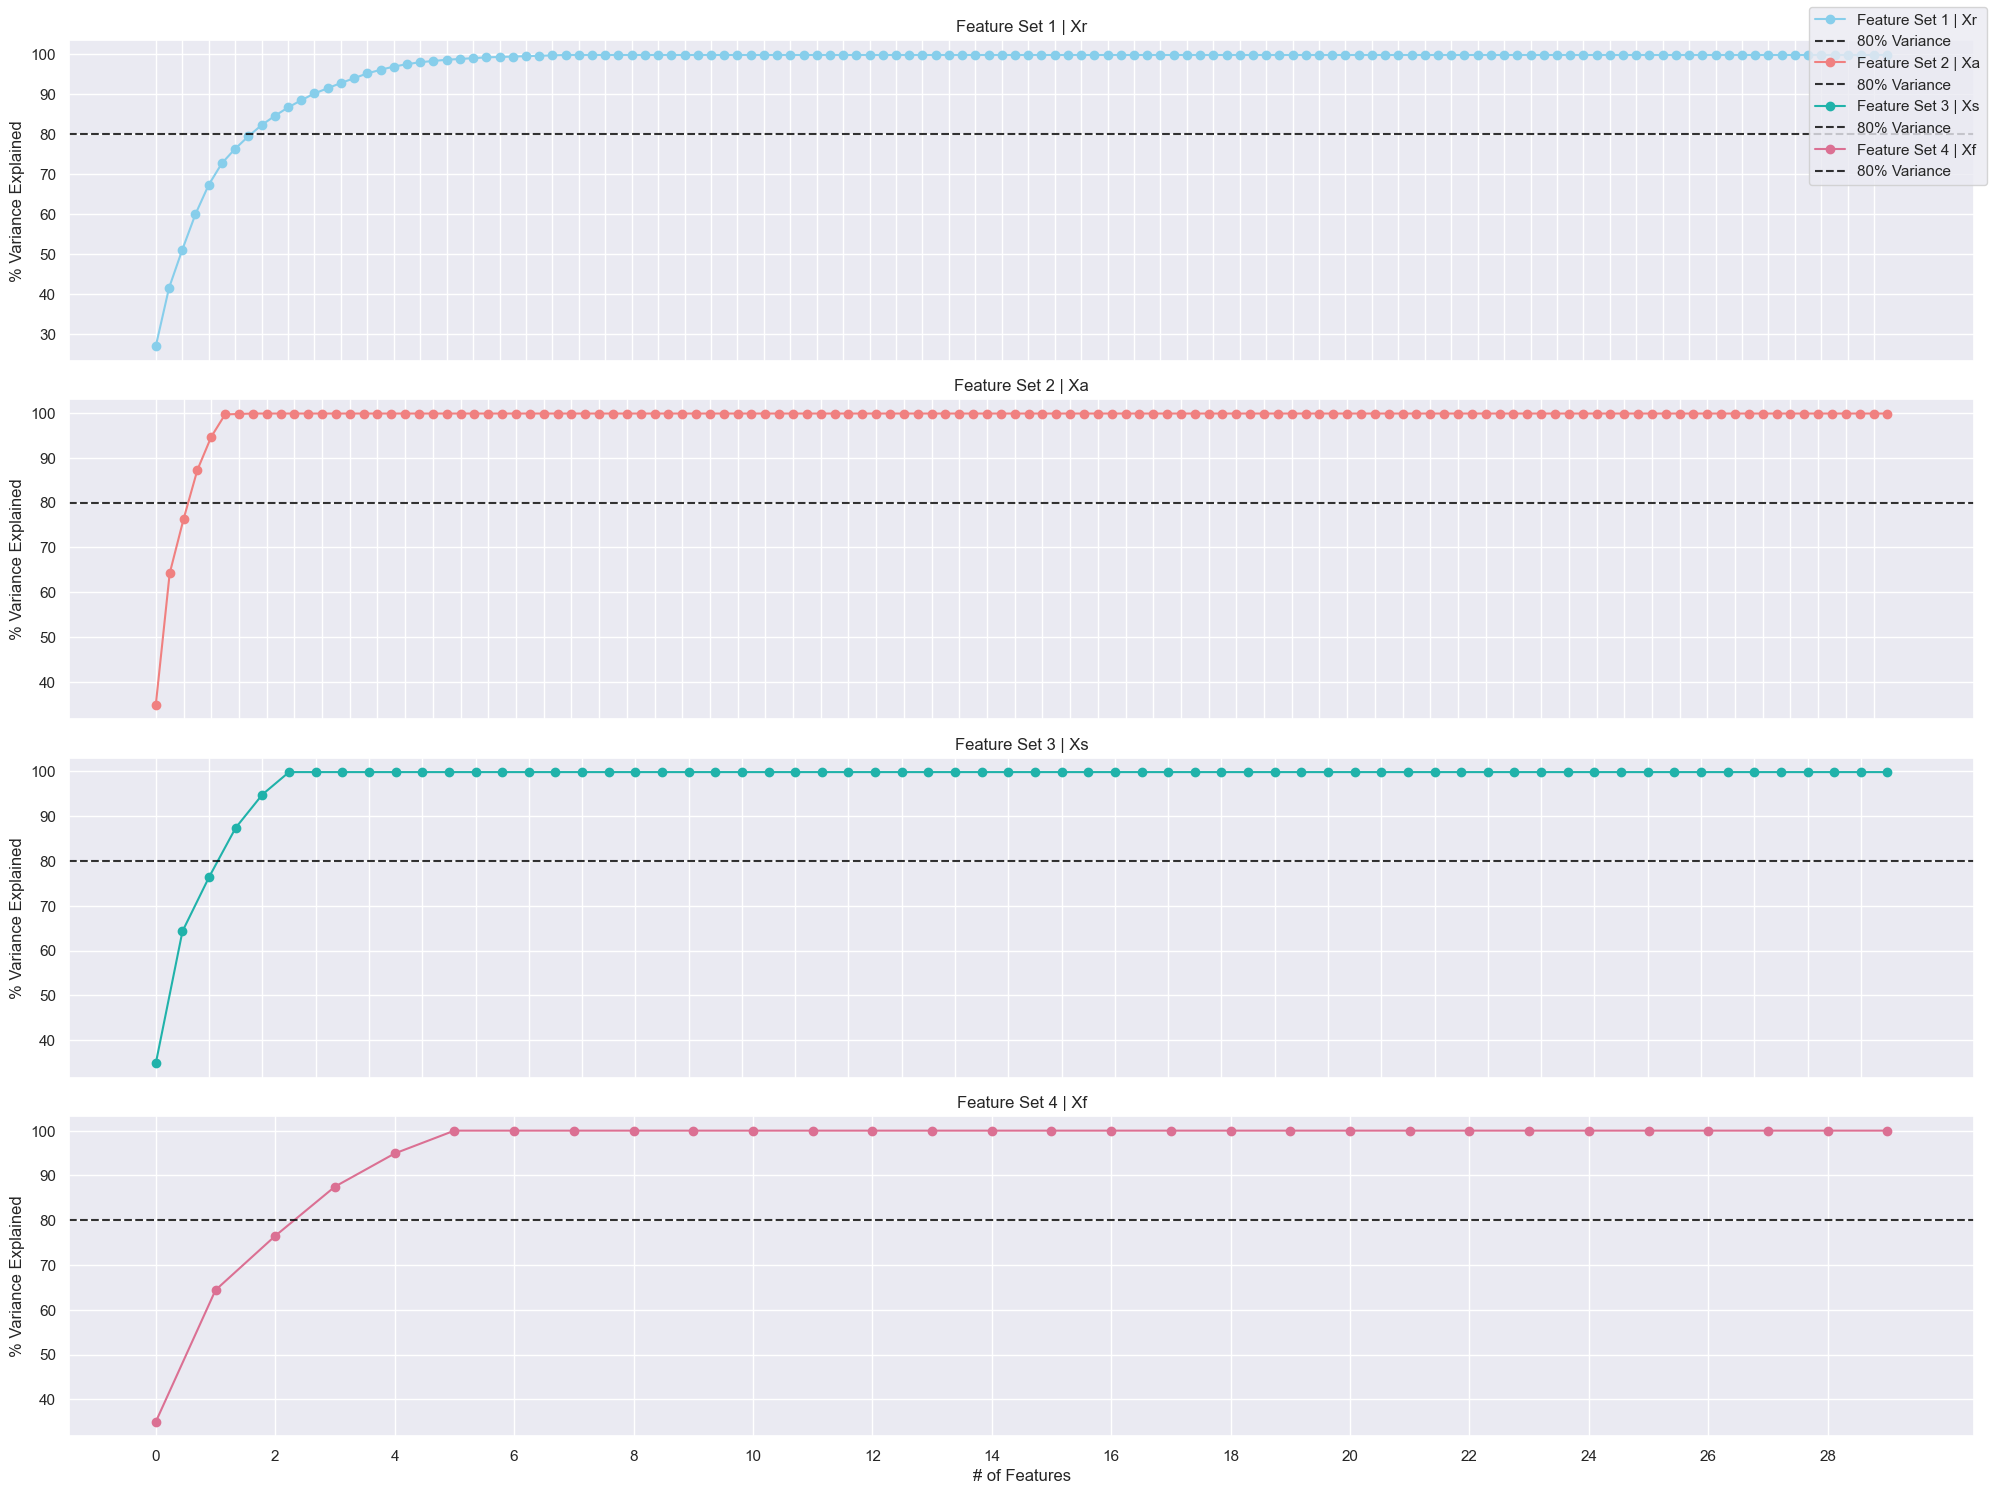

In [277]:
fig, axs = plt.subplots(4, figsize=(20, 15))

# Feature Set 1 | Xr
axs[0].plot(Xr_var, marker='o', label='Feature Set 1 | Xr', color='skyblue')
axs[0].set_title('Feature Set 1 | Xr')
axs[0].axhline(y=80, color='black', alpha=0.8, linestyle='--', label='80% Variance')
axs[0].grid(True)
axs[0].set_xlabel("# of Features")
axs[0].set_ylabel("% Variance Explained")
axs[0].set_xticks(np.arange(0, len(Xr_var), step=2))

# Feature Set 2 | Xa
axs[1].plot(Xa_var, marker='o', label='Feature Set 2 | Xa', color='lightcoral')
axs[1].set_title('Feature Set 2 | Xa')
axs[1].axhline(y=80, color='black', alpha=0.8, linestyle='--', label='80% Variance')
axs[1].grid(True)
axs[1].set_xlabel("# of Features")
axs[1].set_ylabel("% Variance Explained")
axs[1].set_xticks(np.arange(0, len(Xa_var), step=2))

# Feature Set 3 | Xs
axs[2].plot(Xs_var, marker='o', label='Feature Set 3 | Xs', color='lightseagreen')
axs[2].set_title('Feature Set 3 | Xs')
axs[2].axhline(y=80, color='black', alpha=0.8, linestyle='--', label='80% Variance')
axs[2].grid(True)
axs[2].set_xlabel("# of Features")
axs[2].set_ylabel("% Variance Explained")
axs[2].set_xticks(np.arange(0, len(Xs_var), step=2))

# Feature Set 4 | Xf
axs[3].plot(Xf_var, marker='o', label='Feature Set 4 | Xf', color='palevioletred')
axs[3].set_title('Feature Set 4 | Xf')
axs[3].axhline(y=80, color='black', alpha=0.8, linestyle='--', label='80% Variance')
axs[3].grid(True)
axs[3].set_xlabel("# of Features")
axs[3].set_ylabel("% Variance Explained")
axs[3].set_xticks(np.arange(0, len(Xf_var), step=2))

for ax in axs.flat:
    ax.label_outer()

fig.legend(loc='upper right')
plt.tight_layout()
plt.show()

## 6.3 Linear Discriminant Analysis

### Original Dataset | Feature Set 1 | Xr

It was not possible to conduct LDA due to limited data points per unique class.

### Improved Augmented Dataset | Feature Set 2 | Xa

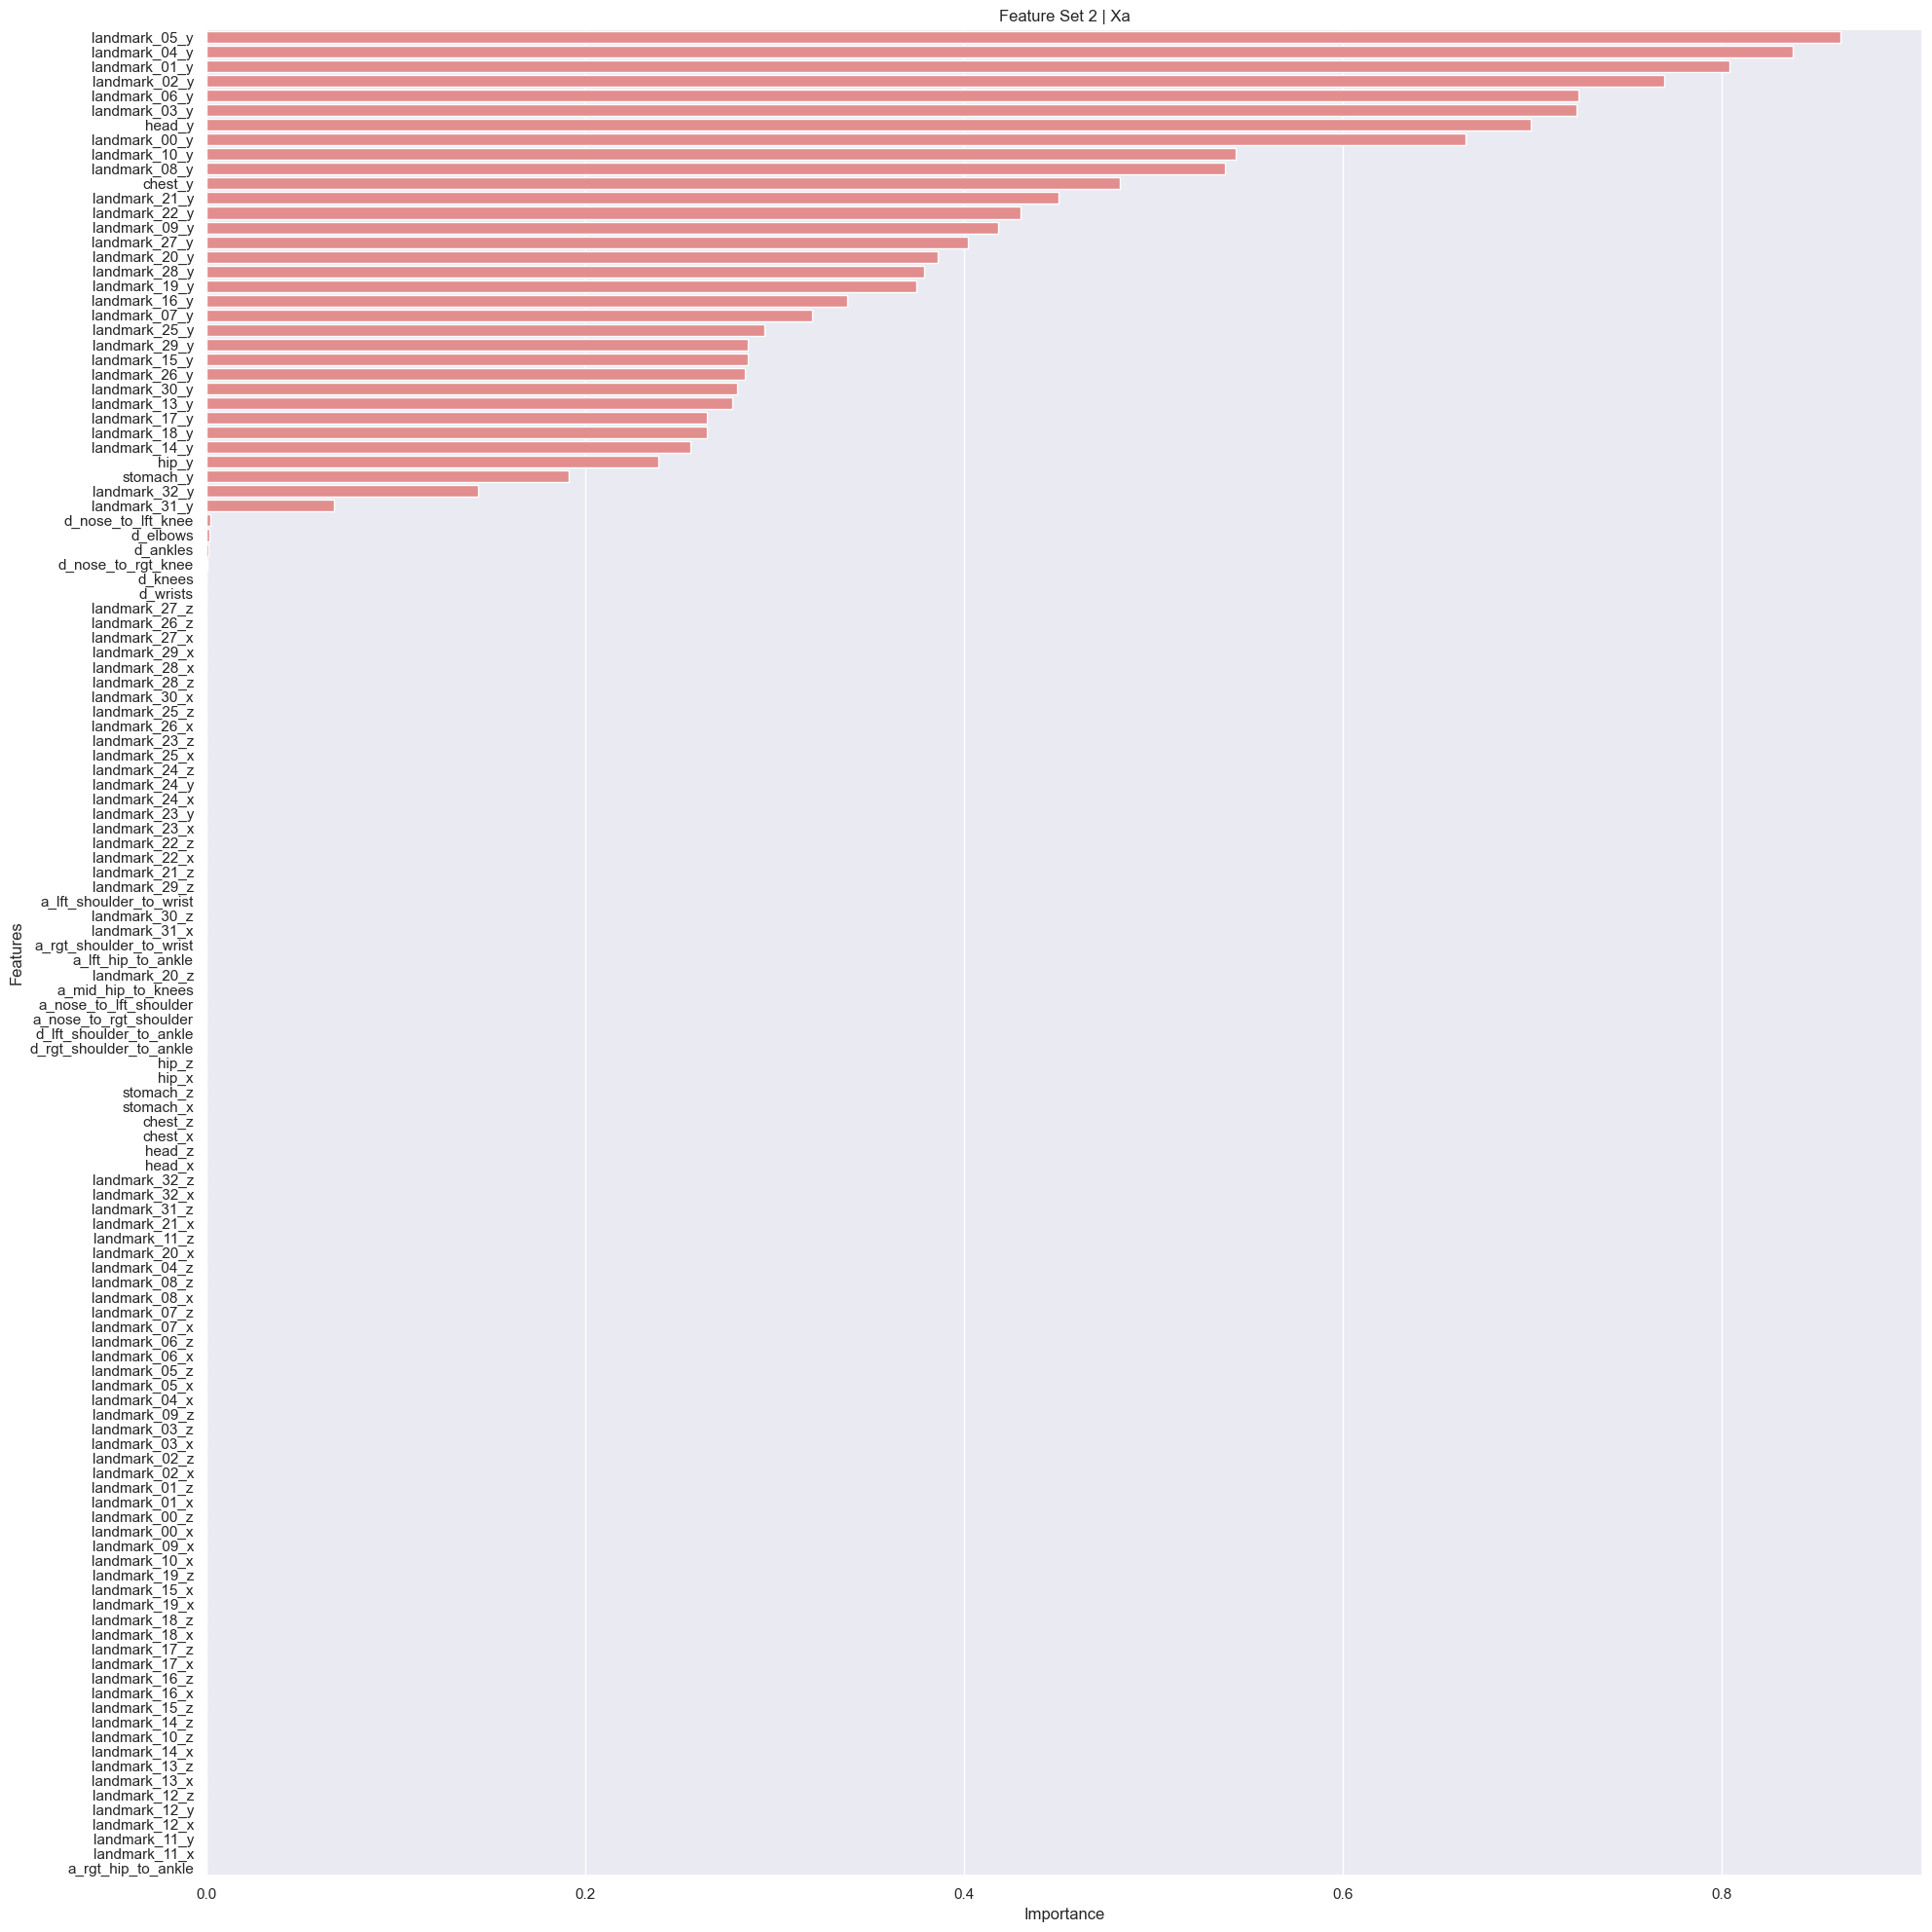

In [278]:
Xa_lda = LinearDiscriminantAnalysis(n_components=len(Xa.columns))
Xa_lda.fit(Xa, ya)
Xa_importances = permutation_importance(Xa_lda, Xa, ya, n_repeats=10)
Xa_features = Xa.columns
Xa_sorted_importances = dict(sorted(zip(Xa_features, Xa_importances.importances_mean), key=lambda item: item[1], reverse=True))
Xa_importances_df = pd.DataFrame(list(Xa_sorted_importances.items()), columns=['feature', 'importance'])
Xa_importances_df = Xa_importances_df.sort_values(by='importance', ascending=False)

sns.set(rc={'figure.figsize':(20,20)})
sns.barplot(x='importance', y='feature', data=Xa_importances_df, color='lightcoral')
plt.title('Feature Set 2 | Xa')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

### Improved Augmented Dataset | Feature Set 3 | Xs

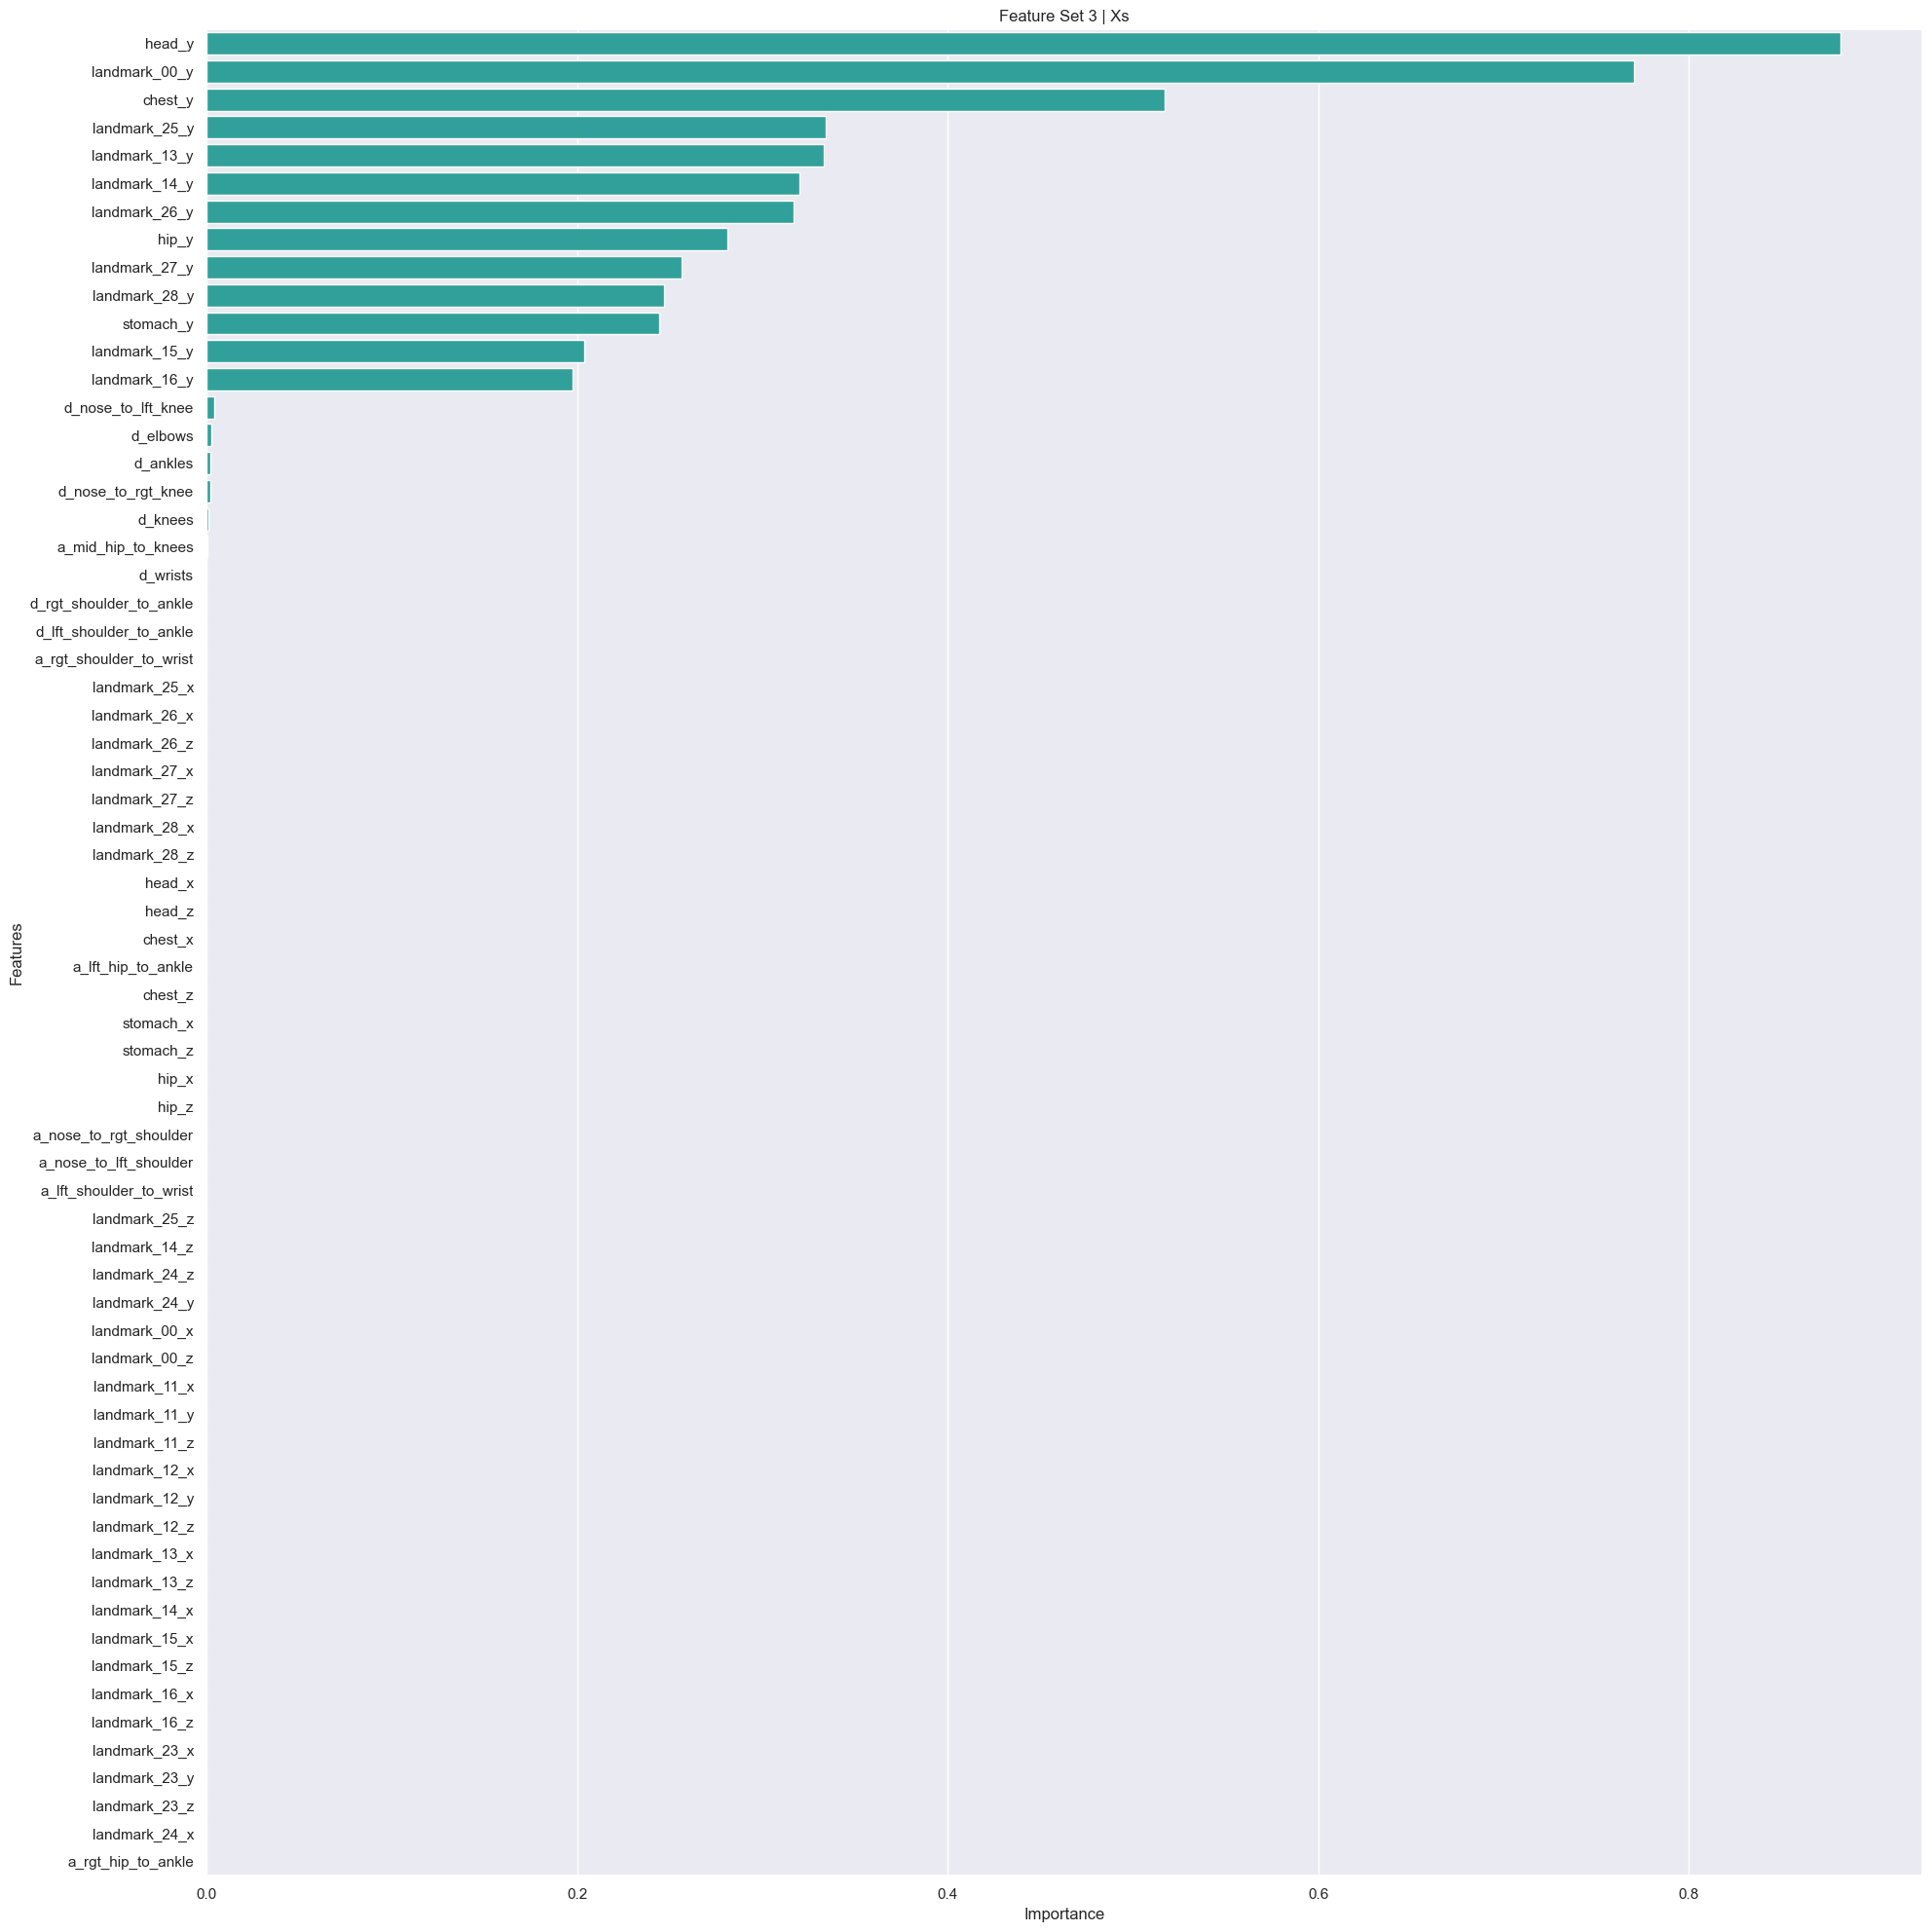

In [279]:
Xs_lda = LinearDiscriminantAnalysis(n_components=len(Xs.columns))
Xs_lda.fit(Xs, ya)
Xs_importances = permutation_importance(Xs_lda, Xs, ya, n_repeats=10)
Xs_features = Xs.columns
Xs_sorted_importances = dict(sorted(zip(Xs_features, Xs_importances.importances_mean), key=lambda item: item[1], reverse=True))
Xs_importances_df = pd.DataFrame(list(Xs_sorted_importances.items()), columns=['feature', 'importance'])
Xs_importances_df = Xs_importances_df.sort_values(by='importance', ascending=False)

sns.set(rc={'figure.figsize':(20,20)})
sns.barplot(x='importance', y='feature', data=Xs_importances_df, color='lightseagreen')
plt.title('Feature Set 3 | Xs')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

### Improved Augmented Dataset | Feature Set 4 | Xf

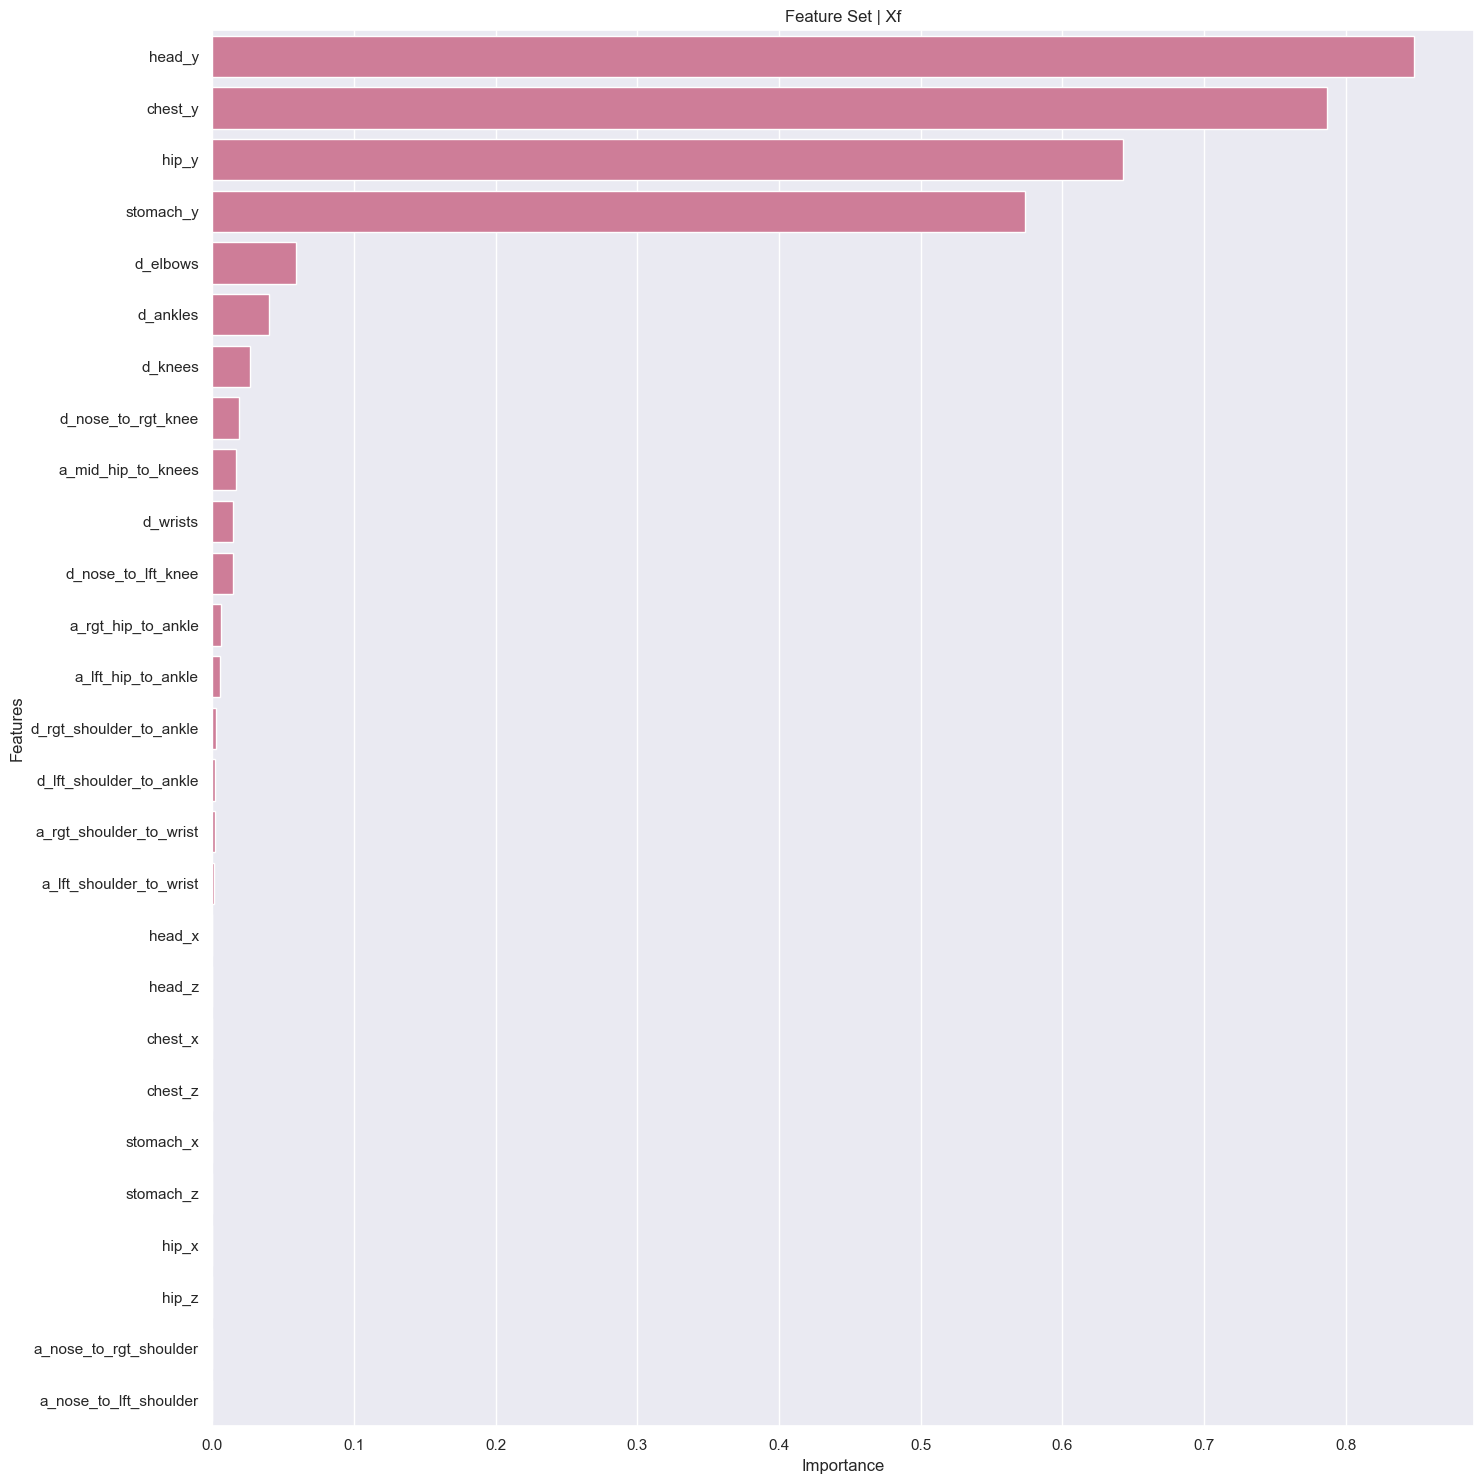

In [303]:
Xf_lda = LinearDiscriminantAnalysis(n_components=len(Xf.columns))
Xf_lda.fit(Xf, ya)
Xf_importances = permutation_importance(Xf_lda, Xf, ya, n_repeats=10)
Xf_features = Xf.columns
Xf_sorted_importances = dict(sorted(zip(Xf_features, Xf_importances.importances_mean), key=lambda item: item[1], reverse=True))
Xf_importances_df = pd.DataFrame(list(Xf_sorted_importances.items()), columns=['feature', 'importance'])
Xf_importances_df = Xf_importances_df.sort_values(by='importance', ascending=False)

sns.set(rc={'figure.figsize':(15,15)})
sns.barplot(x='importance', y='feature', data=Xf_importances_df, color='palevioletred')
plt.title('Feature Set | Xf')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

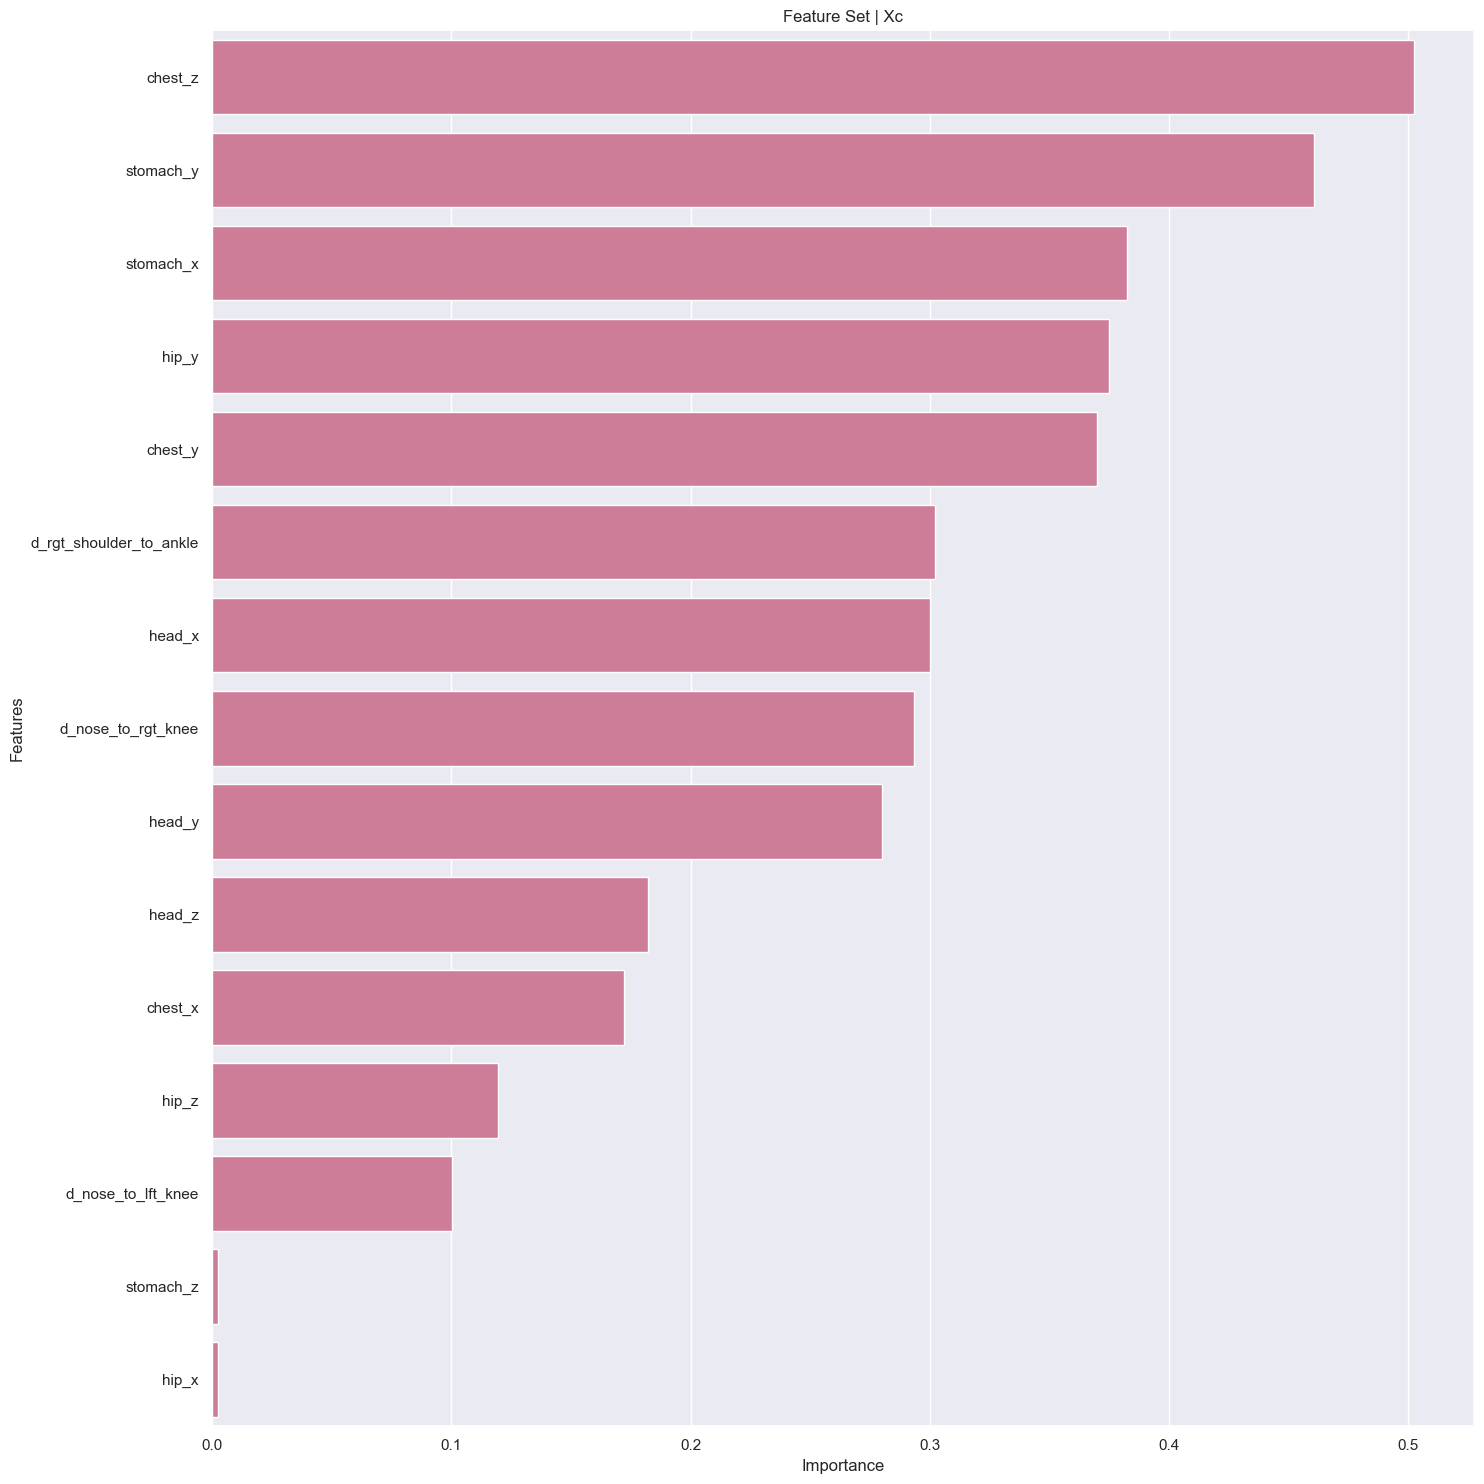

In [308]:
Xc_lda = LinearDiscriminantAnalysis(n_components=len(Xc.columns))
Xc_lda.fit(Xc, ya)
Xc_importances = permutation_importance(Xc_lda, Xc, ya, n_repeats=10)
Xc_features = Xf.columns
Xc_sorted_importances = dict(sorted(zip(Xc_features, Xc_importances.importances_mean), key=lambda item: item[1], reverse=True))
Xc_importances_df = pd.DataFrame(list(Xc_sorted_importances.items()), columns=['feature', 'importance'])
Xc_importances_df = Xc_importances_df.sort_values(by='importance', ascending=False)

sns.set(rc={'figure.figsize':(15,15)})
sns.barplot(x='importance', y='feature', data=Xc_importances_df, color='palevioletred')
plt.title('Feature Set | Xc')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

## 6.4 KNN and Weighted KNN

### Test Data and Expected Labels

|Test Code |Pose Class|Expected Pose Labels| Potential Transition Labels |
|:--|:--|:--|:--|
|Xt0|Fireman Spin|Fireman spin ankle hold,fireman|pole toe walk|
|Xt1,Xt2,Xt3|Spinning Chair|chair,fireman|pole toe walk|
|Xt4,Xt5,Xt6|Inverted Crucifix|-|-|
|Xt7,Xt8,Xt9|Brass Monkey|Brass Monkey|Layback or Remi Sit|

In [281]:
Xt0 = pd.read_csv('data/testing-set-1/processed/test-fireman-spin/pose_data_res.csv')
Xt0 = Xt0.loc[:, ~Xt0.columns.str.contains('_v')]

Xt1 = pd.read_csv('data/testing-set-1/processed/superman/01/pose_data_res.csv')
Xt1 = Xt1.loc[:, ~Xt1.columns.str.contains('_v')]
Xt2 = pd.read_csv('data/testing-set-1/processed/superman/02/pose_data_res.csv')
Xt2 = Xt2.loc[:, ~Xt2.columns.str.contains('_v')]
Xt3 = pd.read_csv('data/testing-set-1/processed/superman/03/pose_data_res.csv')
Xt3 = Xt3.loc[:, ~Xt3.columns.str.contains('_v')]

Xt4 = pd.read_csv('data/testing-set-1/processed/test-inverted-crucifix/01/pose_data_res.csv')
Xt4 = Xt4.loc[:, ~Xt4.columns.str.contains('_v')]
Xt5 = pd.read_csv('data/testing-set-1/processed/test-inverted-crucifix/02/pose_data_res.csv')
Xt5 = Xt5.loc[:, ~Xt5.columns.str.contains('_v')]
Xt6 = pd.read_csv('data/testing-set-1/processed/test-inverted-crucifix/03/pose_data_res.csv')
Xt6 = Xt6.loc[:, ~Xt6.columns.str.contains('_v')]

Xt7 = pd.read_csv('data/testing-set-1/processed/test-brass-monkey/01/pose_data_res.csv')
Xt7 = Xt7.loc[:, ~Xt7.columns.str.contains('_v')]
Xt8 = pd.read_csv('data/testing-set-1/processed/test-brass-monkey/02/pose_data_res.csv')
Xt8 = Xt8.loc[:, ~Xt8.columns.str.contains('_v')]
Xt9 = pd.read_csv('data/testing-set-1/processed/test-brass-monkey/03/pose_data_res.csv')
Xt9 = Xt9.loc[:, ~Xt9.columns.str.contains('_v')]

### Important Features using LDA vs. Manual Selection

In [293]:
# LDA Reduced Features
Xa_important_features = Xa_importances_df[Xa_importances_df['importance'] > 0.1]['feature'].values
Xs_important_features = Xs_importances_df[Xs_importances_df['importance'] > 0.1]['feature'].values
Xf_important_features = Xf_importances_df[Xf_importances_df['importance'] > 0.1]['feature'].values

# Manual Selected Features
Xa_manual_features = Xa.columns.values
Xs_manual_features = Xs.columns.values
Xf_manual_features = Xf.columns.values

### Model Configuration

In [297]:
optimal_k = 1
input_metric = 'cosine'
input_weights = 'distance'

Xa_lda_knn = KNeighborsClassifier(n_neighbors=optimal_k, metric=input_metric, weights=input_weights)
Xs_lda_knn = KNeighborsClassifier(n_neighbors=optimal_k, metric=input_metric, weights=input_weights)
Xf_lda_knn = KNeighborsClassifier(n_neighbors=optimal_k, metric=input_metric, weights=input_weights)
Xa_manual_knn = KNeighborsClassifier(n_neighbors=optimal_k, metric=input_metric, weights=input_weights)
Xs_manual_knn = KNeighborsClassifier(n_neighbors=optimal_k, metric=input_metric, weights=input_weights)
Xf_manual_knn = KNeighborsClassifier(n_neighbors=optimal_k, metric=input_metric, weights=input_weights)

Xa_lda_knn.fit(Xa[Xa_important_features], poses)
Xs_lda_knn.fit(Xs[Xs_important_features], poses)
Xf_lda_knn.fit(Xf[Xf_important_features], poses)
Xa_manual_knn.fit(Xa[Xa_manual_features], poses)
Xs_manual_knn.fit(Xs[Xs_manual_features], poses)
Xf_manual_knn.fit(Xf[Xf_manual_features], poses)

KNeighborsClassifier(metric='cosine', n_neighbors=1, weights='distance')

### Test Category: Fireman Spin

In [298]:
test_category = 'Fireman Spin'
feature_selection = 'LDA Selected'

In [299]:
# Test Case: Xt1
Xa_y_pred1 = Xa_lda_knn.predict(Xt0[Xa_important_features])
Xa_y_pred1_df = pd.DataFrame(Xa_y_pred1, columns=['labels'])

Xs_y_pred1 = Xs_lda_knn.predict(Xt0[Xs_important_features])
Xs_y_pred1_df = pd.DataFrame(Xs_y_pred1, columns=['labels'])

Xf_y_pred1 = Xf_lda_knn.predict(Xt0[Xf_important_features])
Xf_y_pred1_df = pd.DataFrame(Xf_y_pred1, columns=['labels'])

fig, axs = plt.subplots(1, 3, figsize=(30, 15))
fig.suptitle(f'{test_category} | {feature_selection}', fontsize=20)

axs[0].set_title(f'{test_category} (Case 1) using Feature Set 2 (Xa)', fontsize=16)
axs[1].set_title(f'{test_category} (Case 1) using Feature Set 3 (Xs)', fontsize=16)
axs[2].set_title(f'{test_category} (Case 1) using Feature Set 4 (Xf)', fontsize=16)
sns.countplot(data=Xa_y_pred1_df, y='labels', order=Xa_y_pred1_df['labels'].value_counts().index, ax=axs[0])
sns.countplot(data=Xs_y_pred1_df, y='labels', order=Xs_y_pred1_df['labels'].value_counts().index, ax=axs[1])
sns.countplot(data=Xf_y_pred1_df, y='labels', order=Xf_y_pred1_df['labels'].value_counts().index, ax=axs[2])

KeyError: "['head_y'] not in index"

<Axes: title={'center': 'Fireman Spin (Case 1) using Feature Set 4 (Xf)'}, xlabel='count', ylabel='labels'>

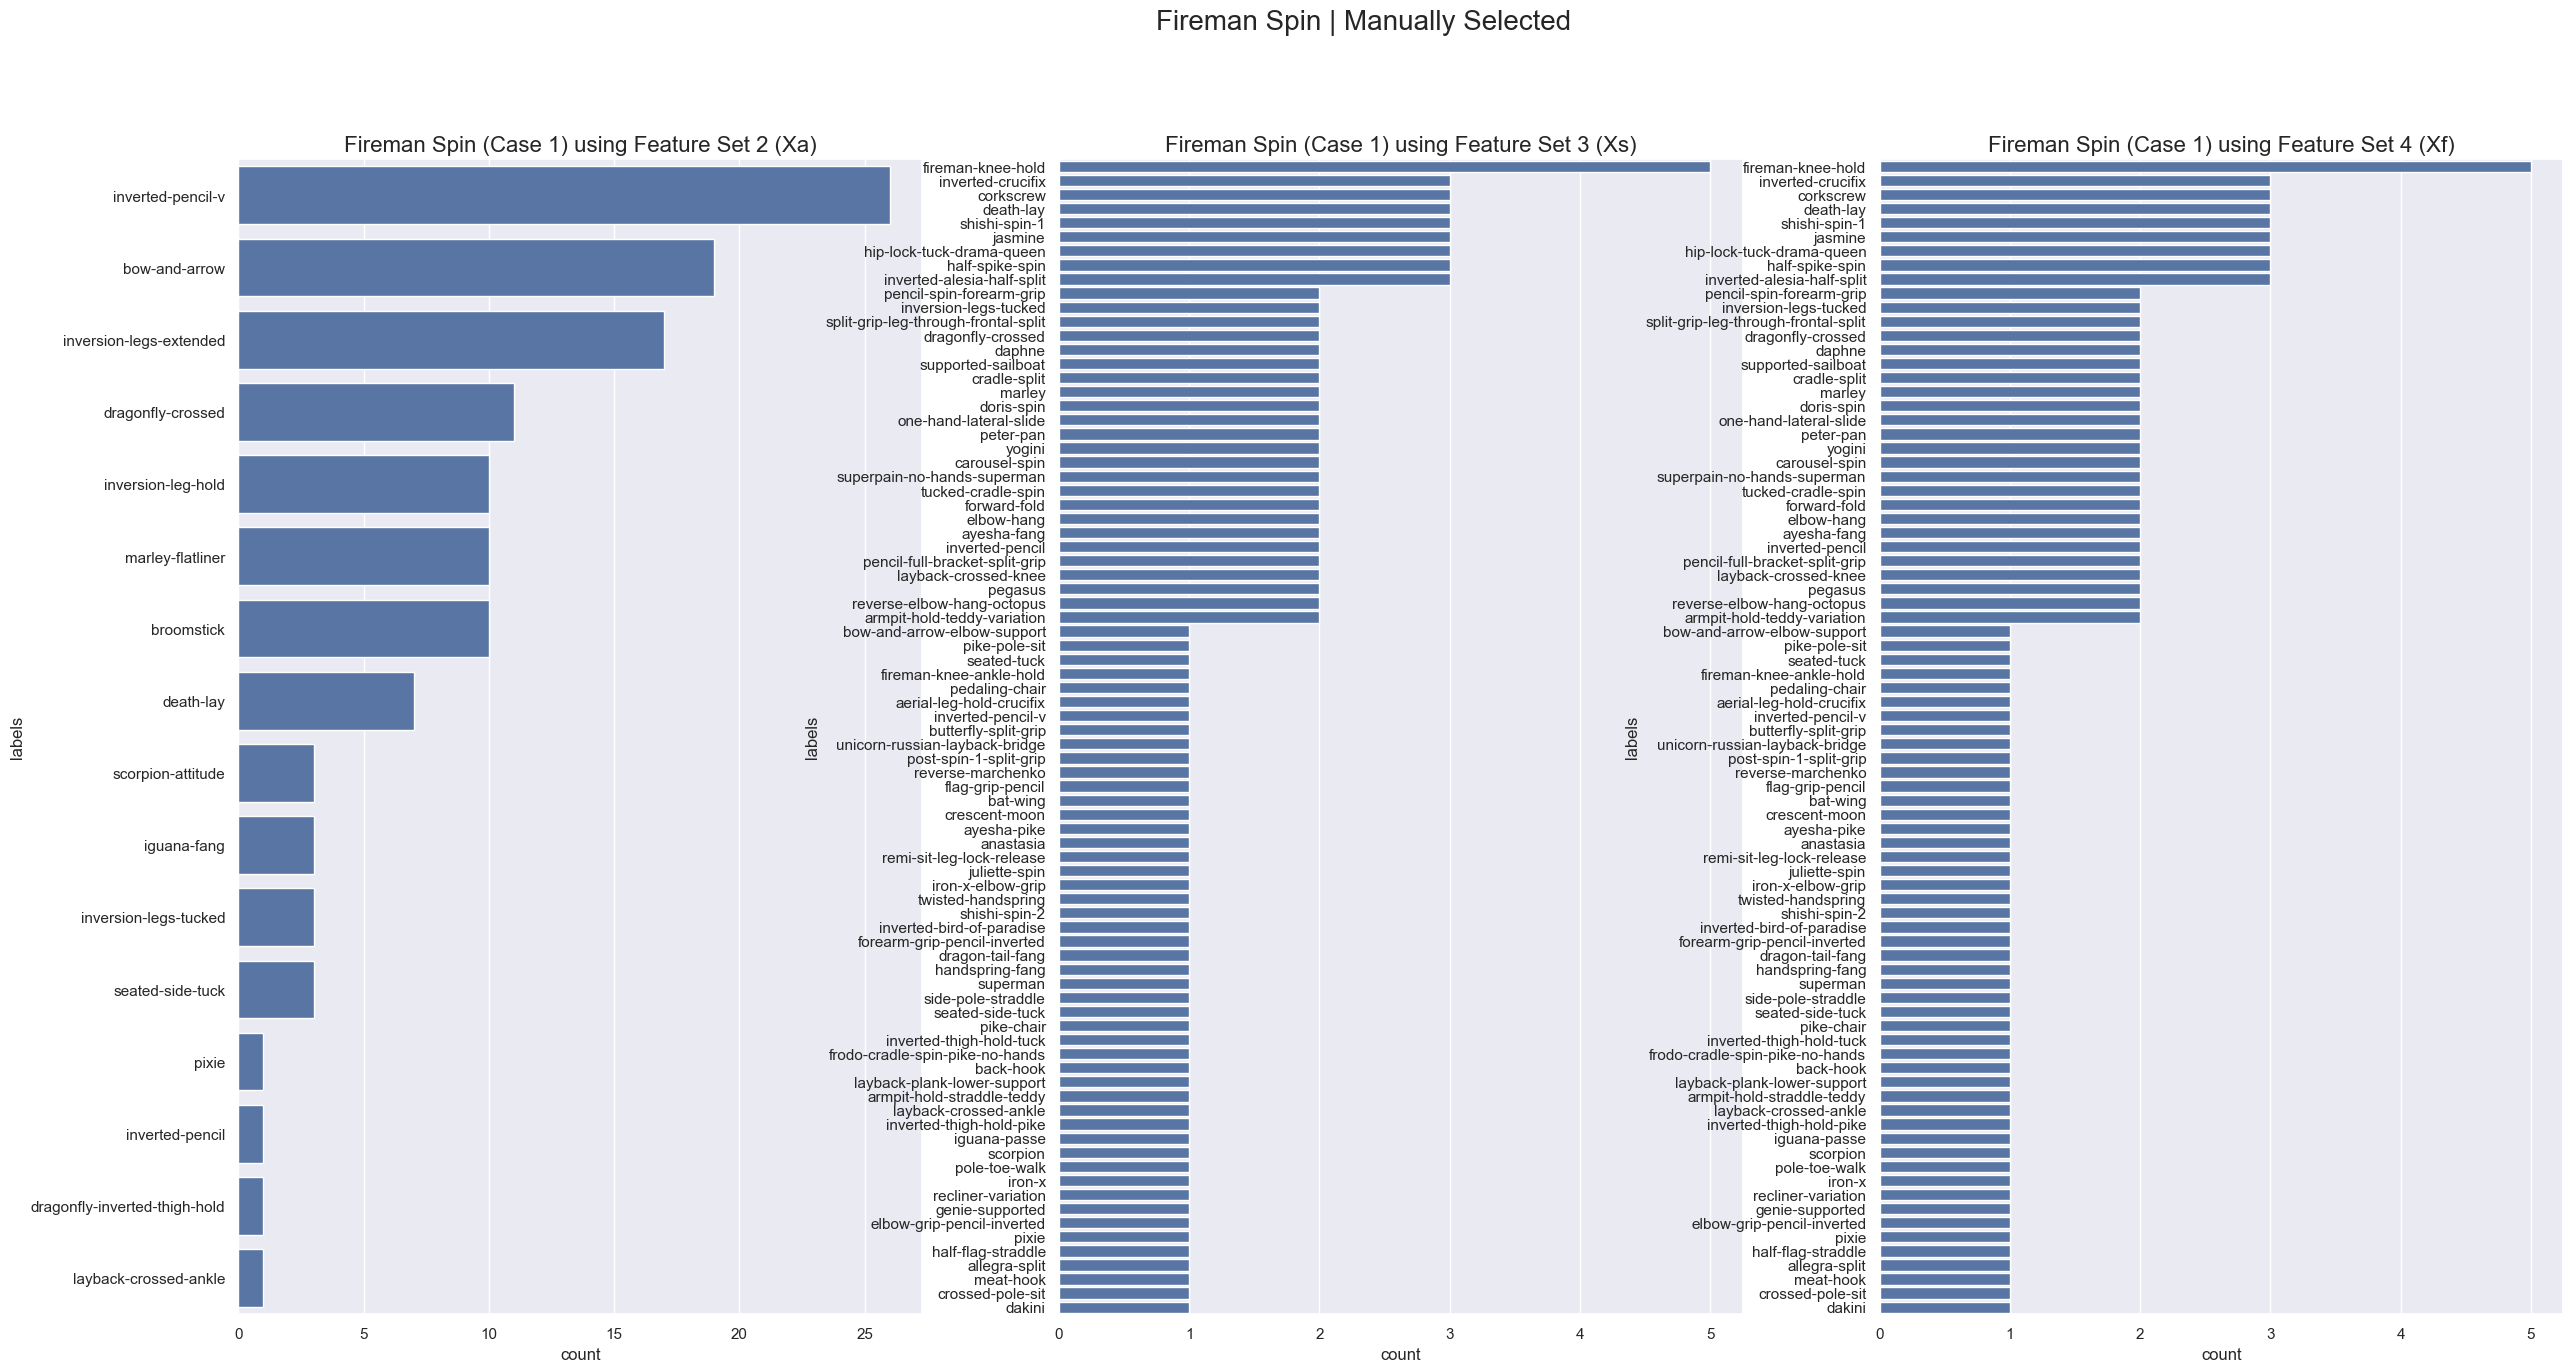

In [248]:
feature_selection = 'Manually Selected'

# Test Case: Xt1
Xa_y_pred1 = Xa_manual_knn.predict(Xt0[Xa_manual_features])
Xa_y_pred1_df = pd.DataFrame(Xa_y_pred1, columns=['labels'])

Xs_y_pred1 = Xs_manual_knn.predict(Xt0[Xs_manual_features])
Xs_y_pred1_df = pd.DataFrame(Xs_y_pred1, columns=['labels'])

Xf_y_pred1 = Xf_manual_knn.predict(Xt0[Xf_manual_features])
Xf_y_pred1_df = pd.DataFrame(Xf_y_pred1, columns=['labels'])

fig, axs = plt.subplots(1, 3, figsize=(30, 15))
fig.suptitle(f'{test_category} | {feature_selection}', fontsize=20)

axs[0].set_title(f'{test_category} (Case 1) using Feature Set 2 (Xa)', fontsize=16)
axs[1].set_title(f'{test_category} (Case 1) using Feature Set 3 (Xs)', fontsize=16)
axs[2].set_title(f'{test_category} (Case 1) using Feature Set 4 (Xf)', fontsize=16)
sns.countplot(data=Xa_y_pred1_df, y='labels', order=Xa_y_pred1_df['labels'].value_counts().index, ax=axs[0])
sns.countplot(data=Xs_y_pred1_df, y='labels', order=Xs_y_pred1_df['labels'].value_counts().index, ax=axs[1])
sns.countplot(data=Xf_y_pred1_df, y='labels', order=Xf_y_pred1_df['labels'].value_counts().index, ax=axs[2])

### Test Category: Superman

In [284]:
test_category = 'Superman'
feature_selection = 'LDA Selected'

<Axes: title={'center': 'Superman (Case 4) using Feature Set 4 (Xf)'}, xlabel='count', ylabel='labels'>

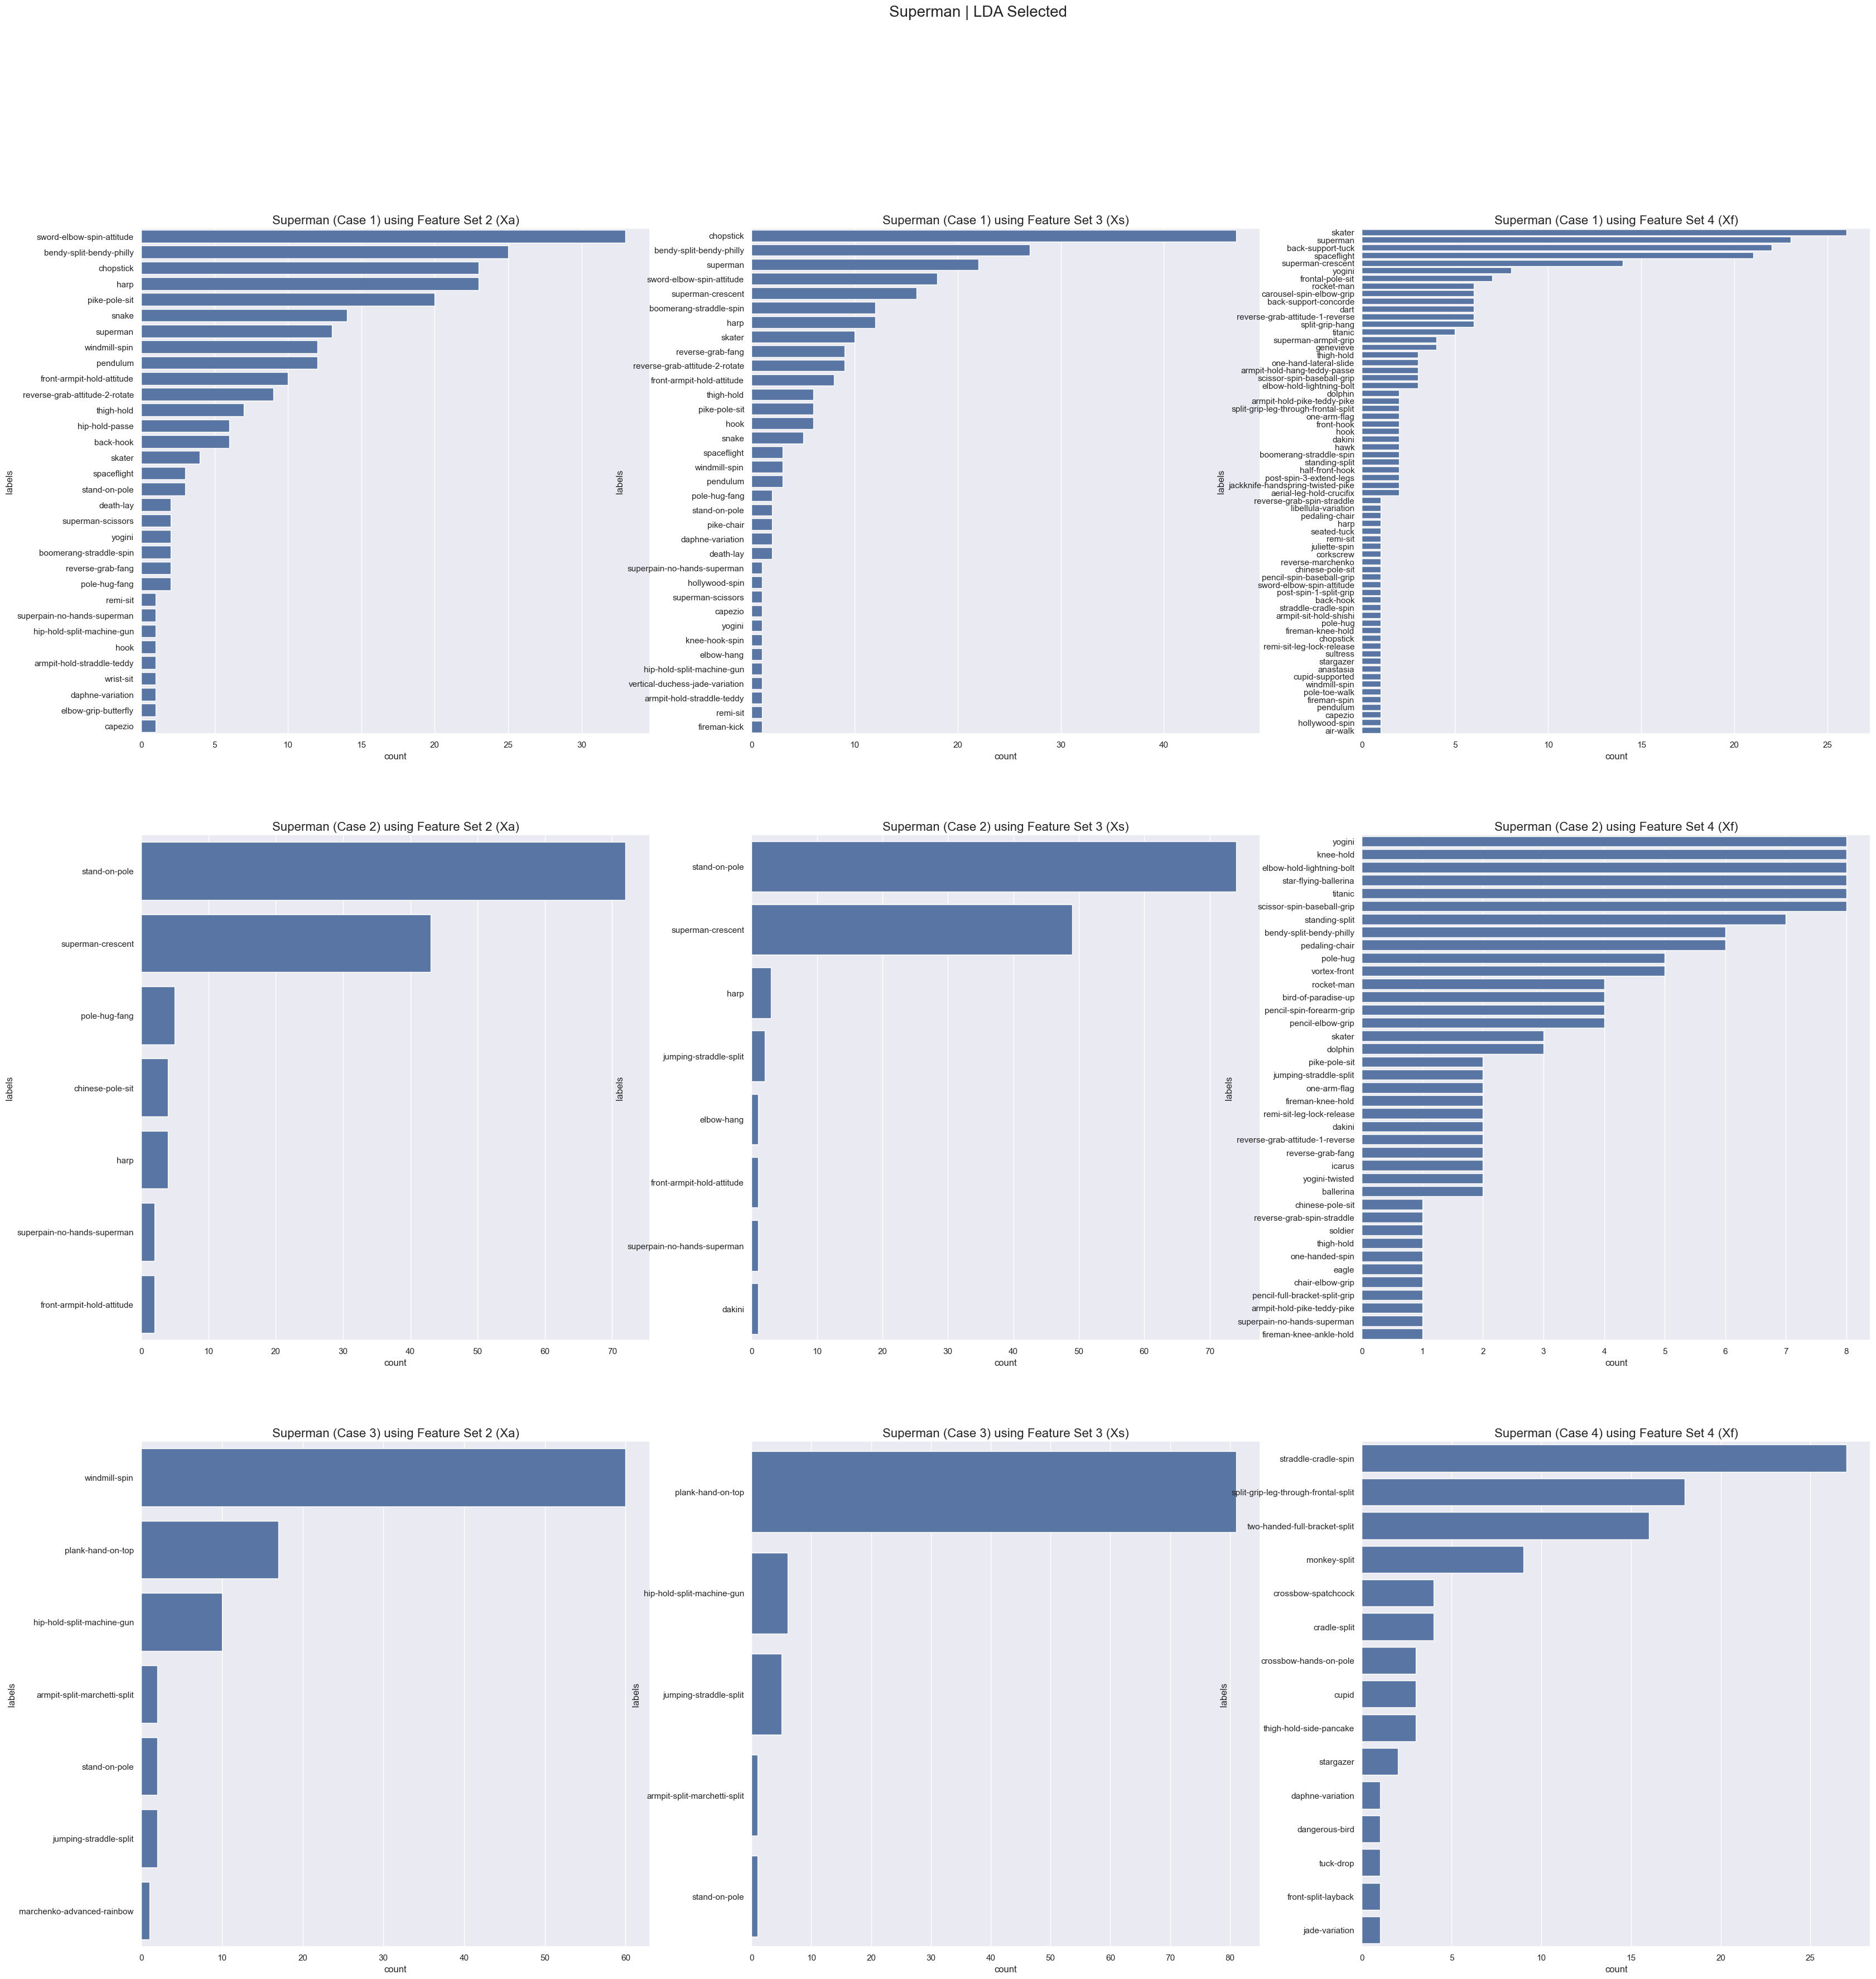

In [285]:
# Test Case: Xt1
Xa_y_pred1 = Xa_lda_knn.predict(Xt1[Xa_important_features])
Xa_y_pred1_df = pd.DataFrame(Xa_y_pred1, columns=['labels'])

Xs_y_pred1 = Xs_lda_knn.predict(Xt1[Xs_important_features])
Xs_y_pred1_df = pd.DataFrame(Xs_y_pred1, columns=['labels'])

Xf_y_pred1 = Xf_lda_knn.predict(Xt1[Xf_important_features])
Xf_y_pred1_df = pd.DataFrame(Xf_y_pred1, columns=['labels'])

# Test Case: Xt2
Xa_y_pred2 = Xa_lda_knn.predict(Xt2[Xa_important_features])
Xa_y_pred2_df = pd.DataFrame(Xa_y_pred2, columns=['labels'])

Xs_y_pred2 = Xs_lda_knn.predict(Xt2[Xs_important_features])
Xs_y_pred2_df = pd.DataFrame(Xs_y_pred2, columns=['labels'])

Xf_y_pred2 = Xf_lda_knn.predict(Xt2[Xf_important_features])
Xf_y_pred2_df = pd.DataFrame(Xf_y_pred2, columns=['labels'])

# Test Case: Xt3
Xa_y_pred3 = Xa_lda_knn.predict(Xt3[Xa_important_features])
Xa_y_pred3_df = pd.DataFrame(Xa_y_pred3, columns=['labels'])

Xs_y_pred3 = Xs_lda_knn.predict(Xt3[Xs_important_features])
Xs_y_pred3_df = pd.DataFrame(Xs_y_pred3, columns=['labels'])

Xf_y_pred3 = Xf_lda_knn.predict(Xt3[Xf_important_features])
Xf_y_pred3_df = pd.DataFrame(Xf_y_pred3, columns=['labels'])

fig, axs = plt.subplots(3, 3, figsize=(40, 40))
fig.suptitle(f'{test_category} | {feature_selection}', fontsize=20)

axs[0,0].set_title(f'{test_category} (Case 1) using Feature Set 2 (Xa)', fontsize=16)
axs[0,1].set_title(f'{test_category} (Case 1) using Feature Set 3 (Xs)', fontsize=16)
axs[0,2].set_title(f'{test_category} (Case 1) using Feature Set 4 (Xf)', fontsize=16)
axs[1,0].set_title(f'{test_category} (Case 2) using Feature Set 2 (Xa)', fontsize=16)
axs[1,1].set_title(f'{test_category} (Case 2) using Feature Set 3 (Xs)', fontsize=16)
axs[1,2].set_title(f'{test_category} (Case 2) using Feature Set 4 (Xf)', fontsize=16)
axs[2,0].set_title(f'{test_category} (Case 3) using Feature Set 2 (Xa)', fontsize=16)
axs[2,1].set_title(f'{test_category} (Case 3) using Feature Set 3 (Xs)', fontsize=16)
axs[2,2].set_title(f'{test_category} (Case 4) using Feature Set 4 (Xf)', fontsize=16)

sns.countplot(data=Xa_y_pred1_df, y='labels', order=Xa_y_pred1_df['labels'].value_counts().index, ax=axs[0,0])
sns.countplot(data=Xs_y_pred1_df, y='labels', order=Xs_y_pred1_df['labels'].value_counts().index, ax=axs[0,1])
sns.countplot(data=Xf_y_pred1_df, y='labels', order=Xf_y_pred1_df['labels'].value_counts().index, ax=axs[0,2])
sns.countplot(data=Xa_y_pred2_df, y='labels', order=Xa_y_pred2_df['labels'].value_counts().index, ax=axs[1,0])
sns.countplot(data=Xs_y_pred2_df, y='labels', order=Xs_y_pred2_df['labels'].value_counts().index, ax=axs[1,1])
sns.countplot(data=Xf_y_pred2_df, y='labels', order=Xf_y_pred2_df['labels'].value_counts().index, ax=axs[1,2])
sns.countplot(data=Xa_y_pred3_df, y='labels', order=Xa_y_pred3_df['labels'].value_counts().index, ax=axs[2,0])
sns.countplot(data=Xs_y_pred3_df, y='labels', order=Xs_y_pred3_df['labels'].value_counts().index, ax=axs[2,1])
sns.countplot(data=Xf_y_pred3_df, y='labels', order=Xf_y_pred3_df['labels'].value_counts().index, ax=axs[2,2])

<Axes: title={'center': 'Superman (Case 4) using Feature Set 4 (Xf)'}, xlabel='count', ylabel='labels'>

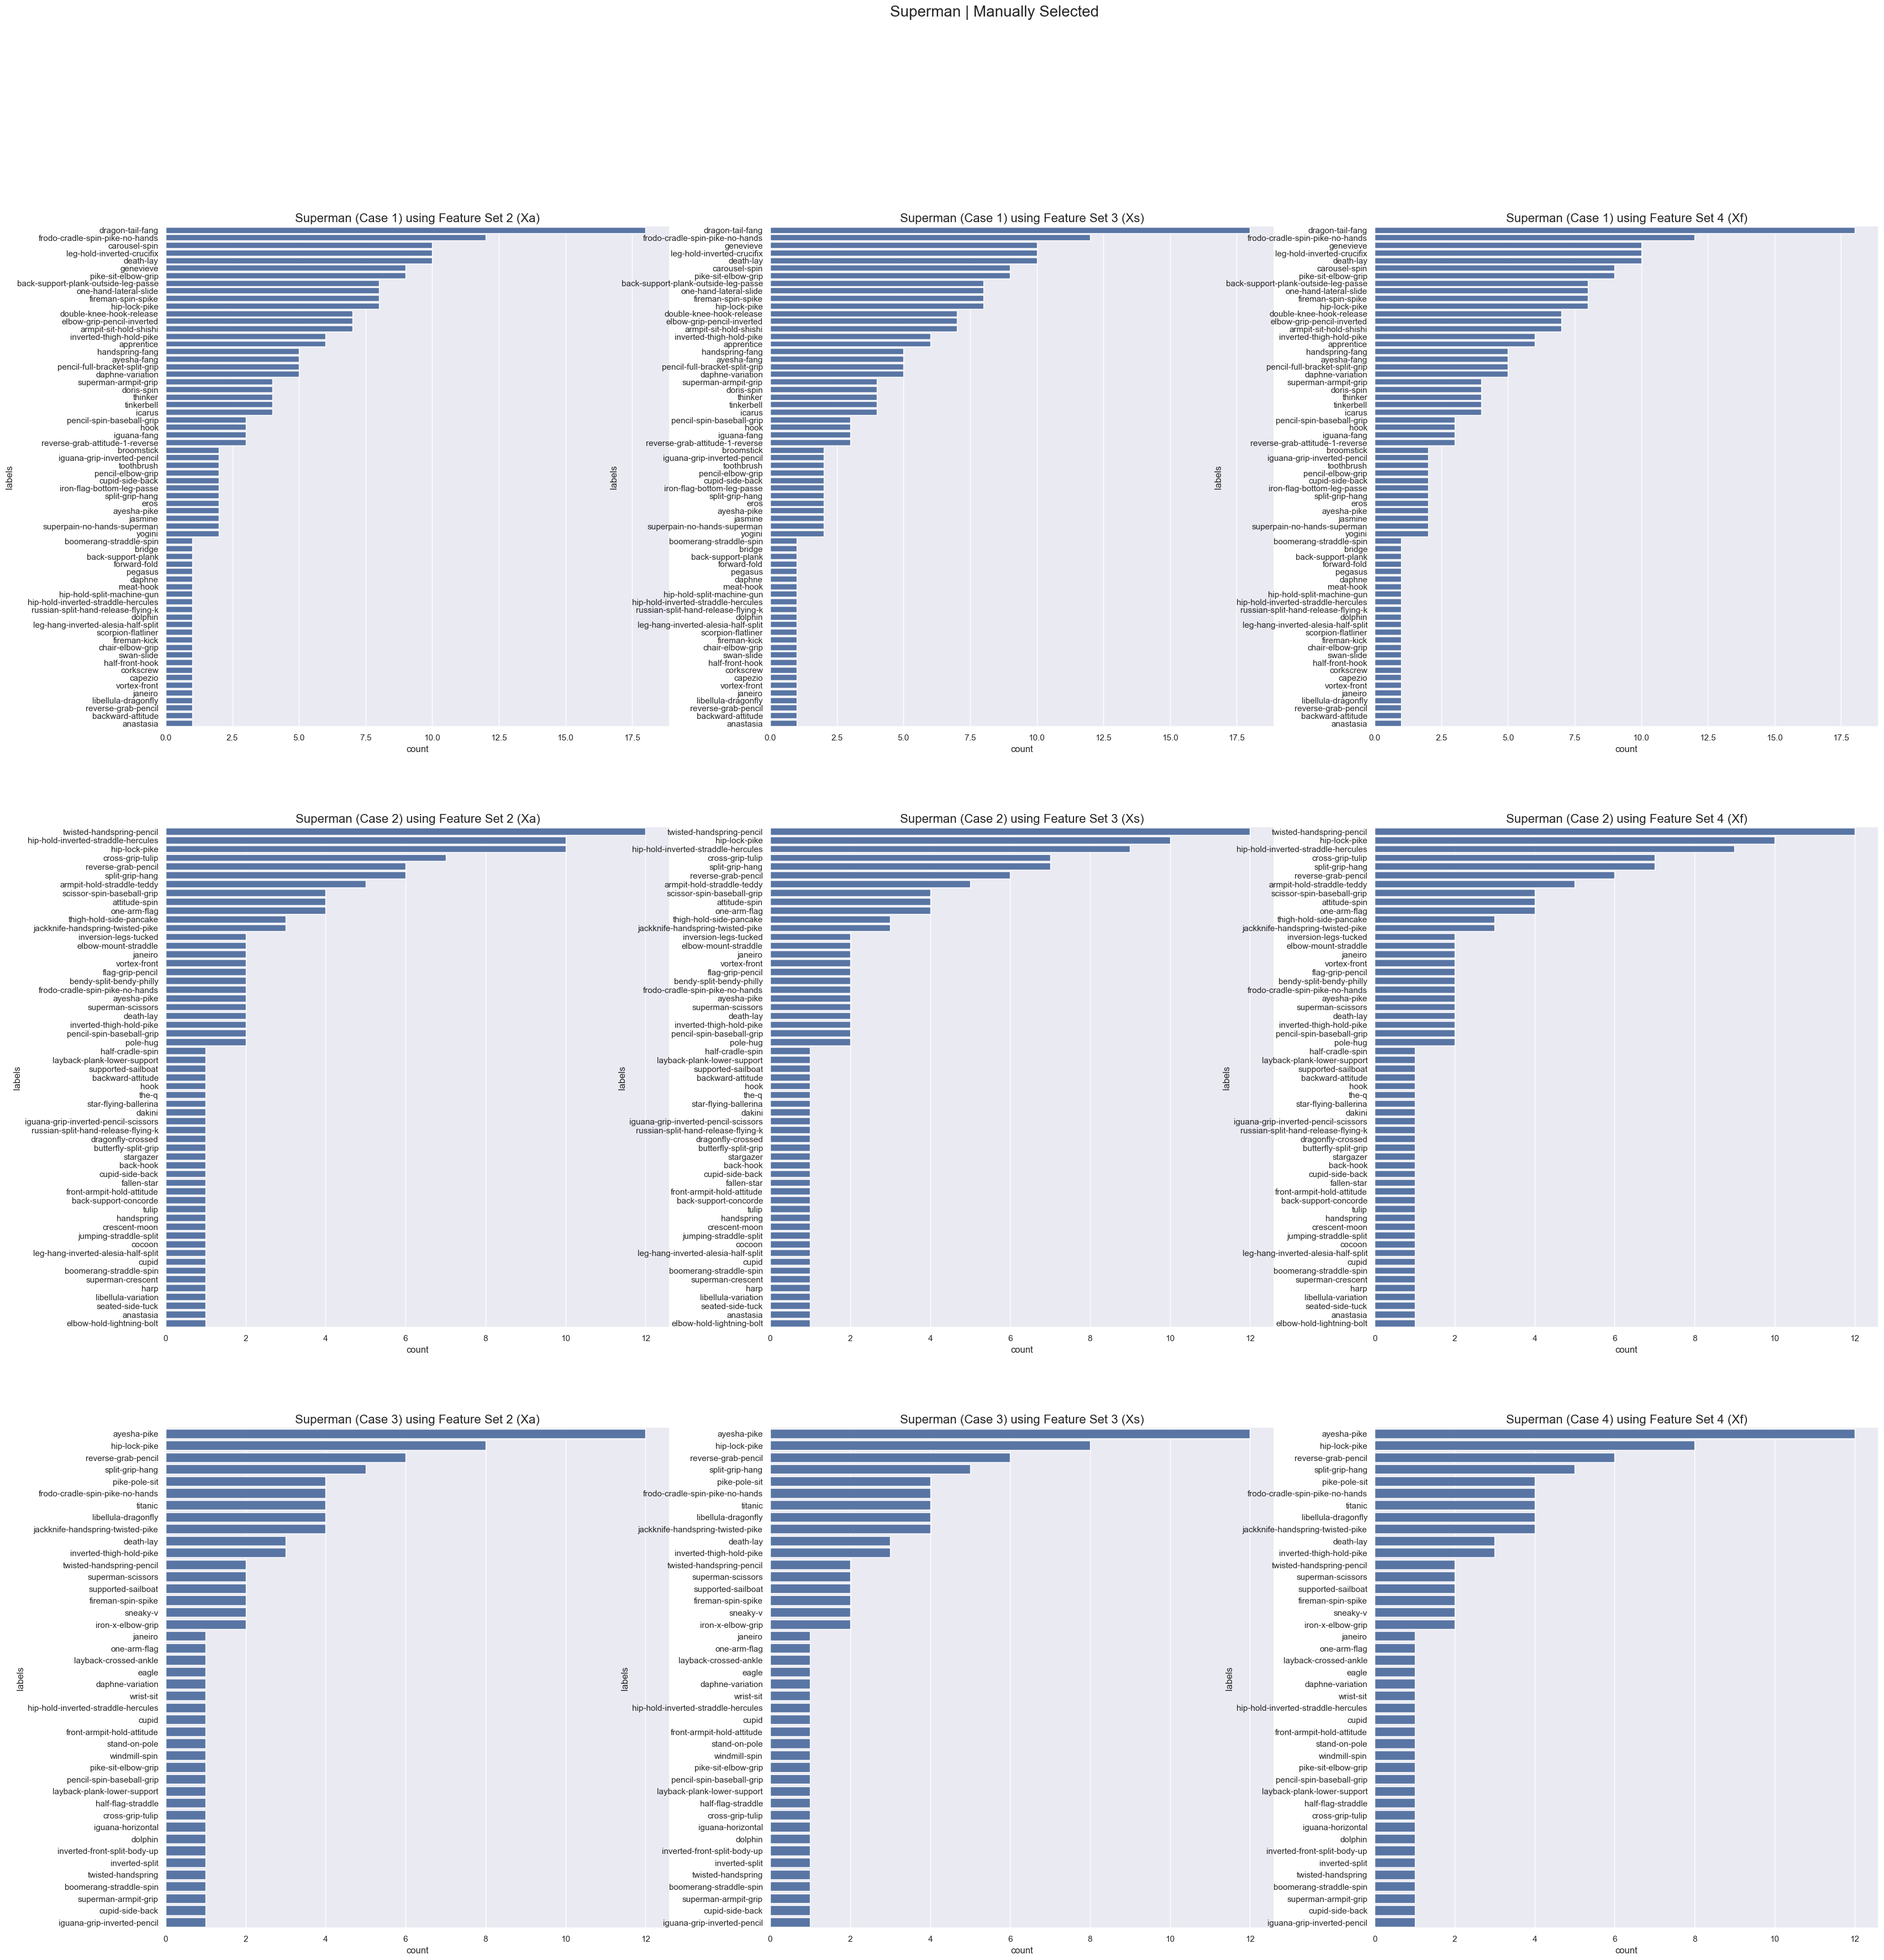

In [286]:
feature_selection = 'Manually Selected'

# Test Case: Xt1
Xa_y_pred1 = Xa_manual_knn.predict(Xt1[Xa_manual_features])
Xa_y_pred1_df = pd.DataFrame(Xa_y_pred1, columns=['labels'])

Xs_y_pred1 = Xs_manual_knn.predict(Xt1[Xs_manual_features])
Xs_y_pred1_df = pd.DataFrame(Xs_y_pred1, columns=['labels'])

Xf_y_pred1 = Xf_manual_knn.predict(Xt1[Xf_manual_features])
Xf_y_pred1_df = pd.DataFrame(Xf_y_pred1, columns=['labels'])

# Test Case: Xt2
Xa_y_pred2 = Xa_manual_knn.predict(Xt2[Xa_manual_features])
Xa_y_pred2_df = pd.DataFrame(Xa_y_pred2, columns=['labels'])

Xs_y_pred2 = Xs_manual_knn.predict(Xt2[Xs_manual_features])
Xs_y_pred2_df = pd.DataFrame(Xs_y_pred2, columns=['labels'])

Xf_y_pred2 = Xf_manual_knn.predict(Xt2[Xf_manual_features])
Xf_y_pred2_df = pd.DataFrame(Xf_y_pred2, columns=['labels'])

# Test Case: Xt3
Xa_y_pred3 = Xa_manual_knn.predict(Xt3[Xa_manual_features])
Xa_y_pred3_df = pd.DataFrame(Xa_y_pred3, columns=['labels'])

Xs_y_pred3 = Xs_manual_knn.predict(Xt3[Xs_manual_features])
Xs_y_pred3_df = pd.DataFrame(Xs_y_pred3, columns=['labels'])

Xf_y_pred3 = Xf_manual_knn.predict(Xt3[Xf_manual_features])
Xf_y_pred3_df = pd.DataFrame(Xf_y_pred3, columns=['labels'])

fig, axs = plt.subplots(3, 3, figsize=(40, 40))
fig.suptitle(f'{test_category} | {feature_selection}', fontsize=20)

axs[0,0].set_title(f'{test_category} (Case 1) using Feature Set 2 (Xa)', fontsize=16)
axs[0,1].set_title(f'{test_category} (Case 1) using Feature Set 3 (Xs)', fontsize=16)
axs[0,2].set_title(f'{test_category} (Case 1) using Feature Set 4 (Xf)', fontsize=16)
axs[1,0].set_title(f'{test_category} (Case 2) using Feature Set 2 (Xa)', fontsize=16)
axs[1,1].set_title(f'{test_category} (Case 2) using Feature Set 3 (Xs)', fontsize=16)
axs[1,2].set_title(f'{test_category} (Case 2) using Feature Set 4 (Xf)', fontsize=16)
axs[2,0].set_title(f'{test_category} (Case 3) using Feature Set 2 (Xa)', fontsize=16)
axs[2,1].set_title(f'{test_category} (Case 3) using Feature Set 3 (Xs)', fontsize=16)
axs[2,2].set_title(f'{test_category} (Case 4) using Feature Set 4 (Xf)', fontsize=16)

sns.countplot(data=Xa_y_pred1_df, y='labels', order=Xa_y_pred1_df['labels'].value_counts().index, ax=axs[0,0])
sns.countplot(data=Xs_y_pred1_df, y='labels', order=Xs_y_pred1_df['labels'].value_counts().index, ax=axs[0,1])
sns.countplot(data=Xf_y_pred1_df, y='labels', order=Xf_y_pred1_df['labels'].value_counts().index, ax=axs[0,2])
sns.countplot(data=Xa_y_pred2_df, y='labels', order=Xa_y_pred2_df['labels'].value_counts().index, ax=axs[1,0])
sns.countplot(data=Xs_y_pred2_df, y='labels', order=Xs_y_pred2_df['labels'].value_counts().index, ax=axs[1,1])
sns.countplot(data=Xf_y_pred2_df, y='labels', order=Xf_y_pred2_df['labels'].value_counts().index, ax=axs[1,2])
sns.countplot(data=Xa_y_pred3_df, y='labels', order=Xa_y_pred3_df['labels'].value_counts().index, ax=axs[2,0])
sns.countplot(data=Xs_y_pred3_df, y='labels', order=Xs_y_pred3_df['labels'].value_counts().index, ax=axs[2,1])
sns.countplot(data=Xf_y_pred3_df, y='labels', order=Xf_y_pred3_df['labels'].value_counts().index, ax=axs[2,2])

### Test Category: Inverted Crucifix

<Axes: title={'center': 'Inverted Crucifix (Case 4) using Feature Set 4 (Xf)'}, xlabel='count', ylabel='labels'>

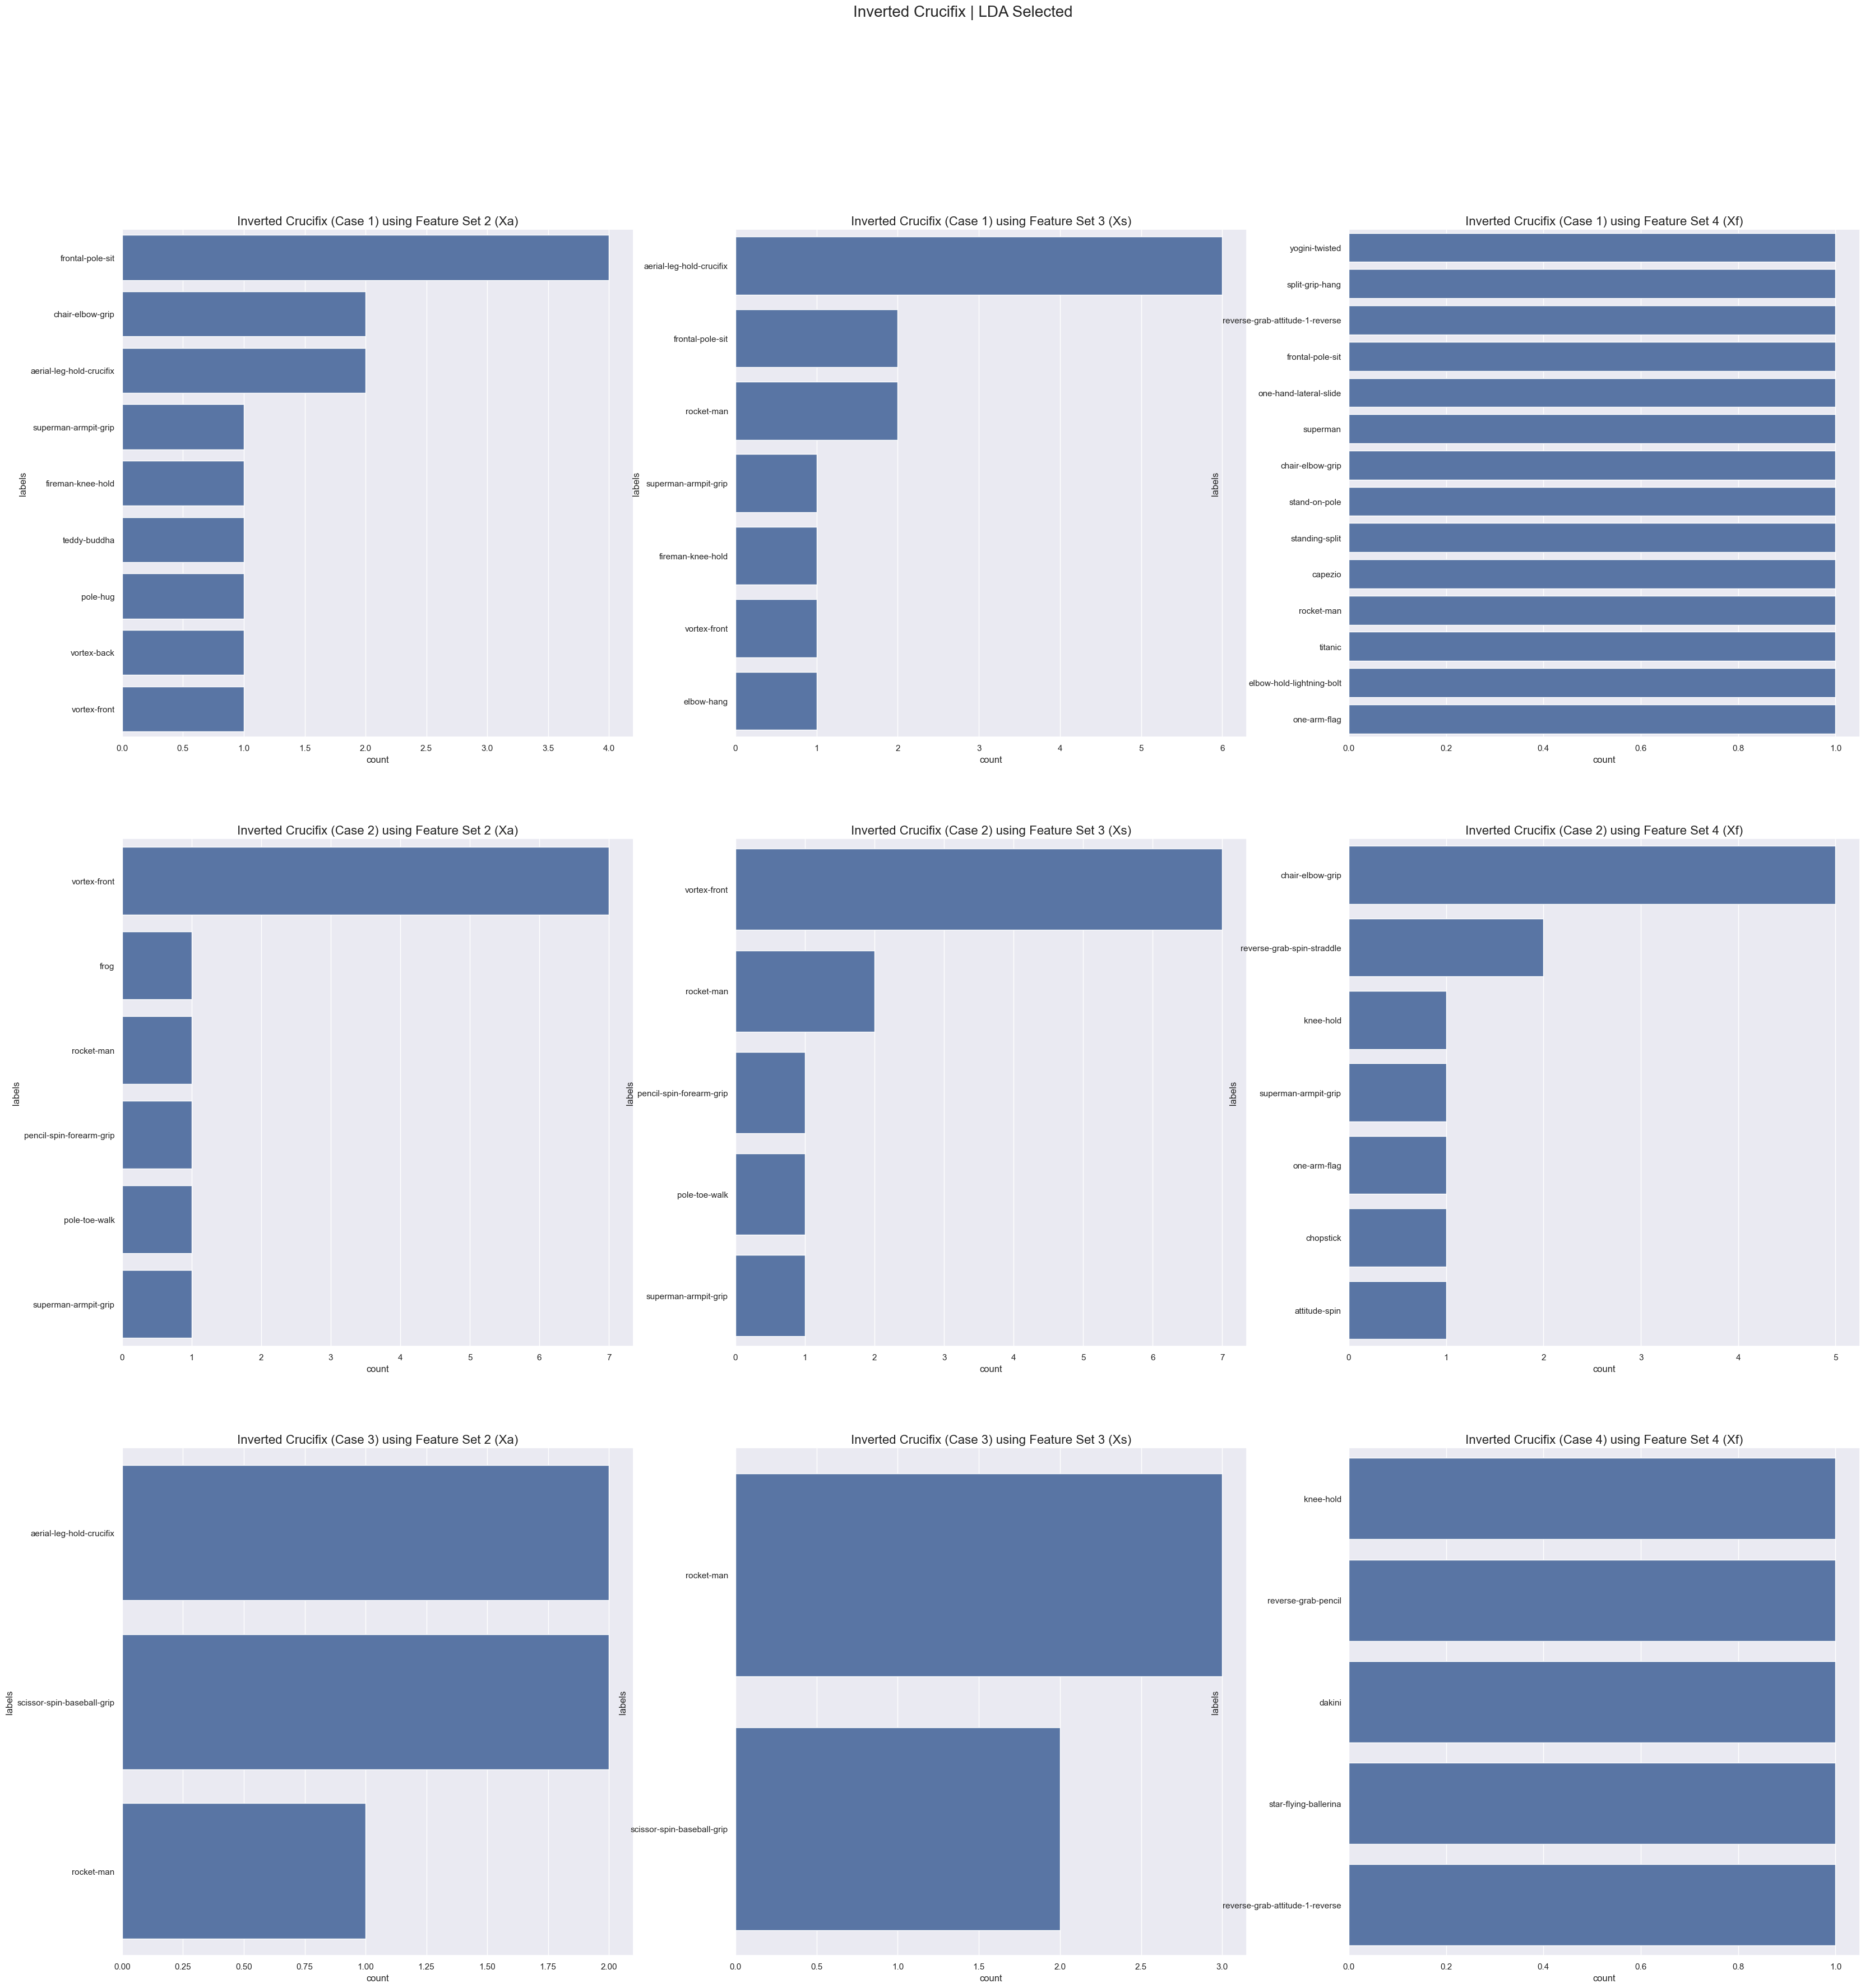

In [253]:
test_category = 'Inverted Crucifix'
feature_selection = 'LDA Selected'

# Test Case: Xt4
Xa_y_pred1 = Xa_lda_knn.predict(Xt4[Xa_important_features])
Xa_y_pred1_df = pd.DataFrame(Xa_y_pred1, columns=['labels'])

Xs_y_pred1 = Xs_lda_knn.predict(Xt4[Xs_important_features])
Xs_y_pred1_df = pd.DataFrame(Xs_y_pred1, columns=['labels'])

Xf_y_pred1 = Xf_lda_knn.predict(Xt4[Xf_important_features])
Xf_y_pred1_df = pd.DataFrame(Xf_y_pred1, columns=['labels'])

# Test Case: Xt5
Xa_y_pred2 = Xa_lda_knn.predict(Xt5[Xa_important_features])
Xa_y_pred2_df = pd.DataFrame(Xa_y_pred2, columns=['labels'])

Xs_y_pred2 = Xs_lda_knn.predict(Xt5[Xs_important_features])
Xs_y_pred2_df = pd.DataFrame(Xs_y_pred2, columns=['labels'])

Xf_y_pred2 = Xf_lda_knn.predict(Xt5[Xf_important_features])
Xf_y_pred2_df = pd.DataFrame(Xf_y_pred2, columns=['labels'])

# Test Case: Xt6
Xa_y_pred3 = Xa_lda_knn.predict(Xt6[Xa_important_features])
Xa_y_pred3_df = pd.DataFrame(Xa_y_pred3, columns=['labels'])

Xs_y_pred3 = Xs_lda_knn.predict(Xt6[Xs_important_features])
Xs_y_pred3_df = pd.DataFrame(Xs_y_pred3, columns=['labels'])

Xf_y_pred3 = Xf_lda_knn.predict(Xt6[Xf_important_features])
Xf_y_pred3_df = pd.DataFrame(Xf_y_pred3, columns=['labels'])

fig, axs = plt.subplots(3, 3, figsize=(40, 40))
fig.suptitle(f'{test_category} | {feature_selection}', fontsize=20)

axs[0,0].set_title(f'{test_category} (Case 1) using Feature Set 2 (Xa)', fontsize=16)
axs[0,1].set_title(f'{test_category} (Case 1) using Feature Set 3 (Xs)', fontsize=16)
axs[0,2].set_title(f'{test_category} (Case 1) using Feature Set 4 (Xf)', fontsize=16)
axs[1,0].set_title(f'{test_category} (Case 2) using Feature Set 2 (Xa)', fontsize=16)
axs[1,1].set_title(f'{test_category} (Case 2) using Feature Set 3 (Xs)', fontsize=16)
axs[1,2].set_title(f'{test_category} (Case 2) using Feature Set 4 (Xf)', fontsize=16)
axs[2,0].set_title(f'{test_category} (Case 3) using Feature Set 2 (Xa)', fontsize=16)
axs[2,1].set_title(f'{test_category} (Case 3) using Feature Set 3 (Xs)', fontsize=16)
axs[2,2].set_title(f'{test_category} (Case 4) using Feature Set 4 (Xf)', fontsize=16)

sns.countplot(data=Xa_y_pred1_df, y='labels', order=Xa_y_pred1_df['labels'].value_counts().index, ax=axs[0,0])
sns.countplot(data=Xs_y_pred1_df, y='labels', order=Xs_y_pred1_df['labels'].value_counts().index, ax=axs[0,1])
sns.countplot(data=Xf_y_pred1_df, y='labels', order=Xf_y_pred1_df['labels'].value_counts().index, ax=axs[0,2])
sns.countplot(data=Xa_y_pred2_df, y='labels', order=Xa_y_pred2_df['labels'].value_counts().index, ax=axs[1,0])
sns.countplot(data=Xs_y_pred2_df, y='labels', order=Xs_y_pred2_df['labels'].value_counts().index, ax=axs[1,1])
sns.countplot(data=Xf_y_pred2_df, y='labels', order=Xf_y_pred2_df['labels'].value_counts().index, ax=axs[1,2])
sns.countplot(data=Xa_y_pred3_df, y='labels', order=Xa_y_pred3_df['labels'].value_counts().index, ax=axs[2,0])
sns.countplot(data=Xs_y_pred3_df, y='labels', order=Xs_y_pred3_df['labels'].value_counts().index, ax=axs[2,1])
sns.countplot(data=Xf_y_pred3_df, y='labels', order=Xf_y_pred3_df['labels'].value_counts().index, ax=axs[2,2])

<Axes: title={'center': 'Inverted Crucifix (Case 4) using Feature Set 4 (Xf)'}, xlabel='count', ylabel='labels'>

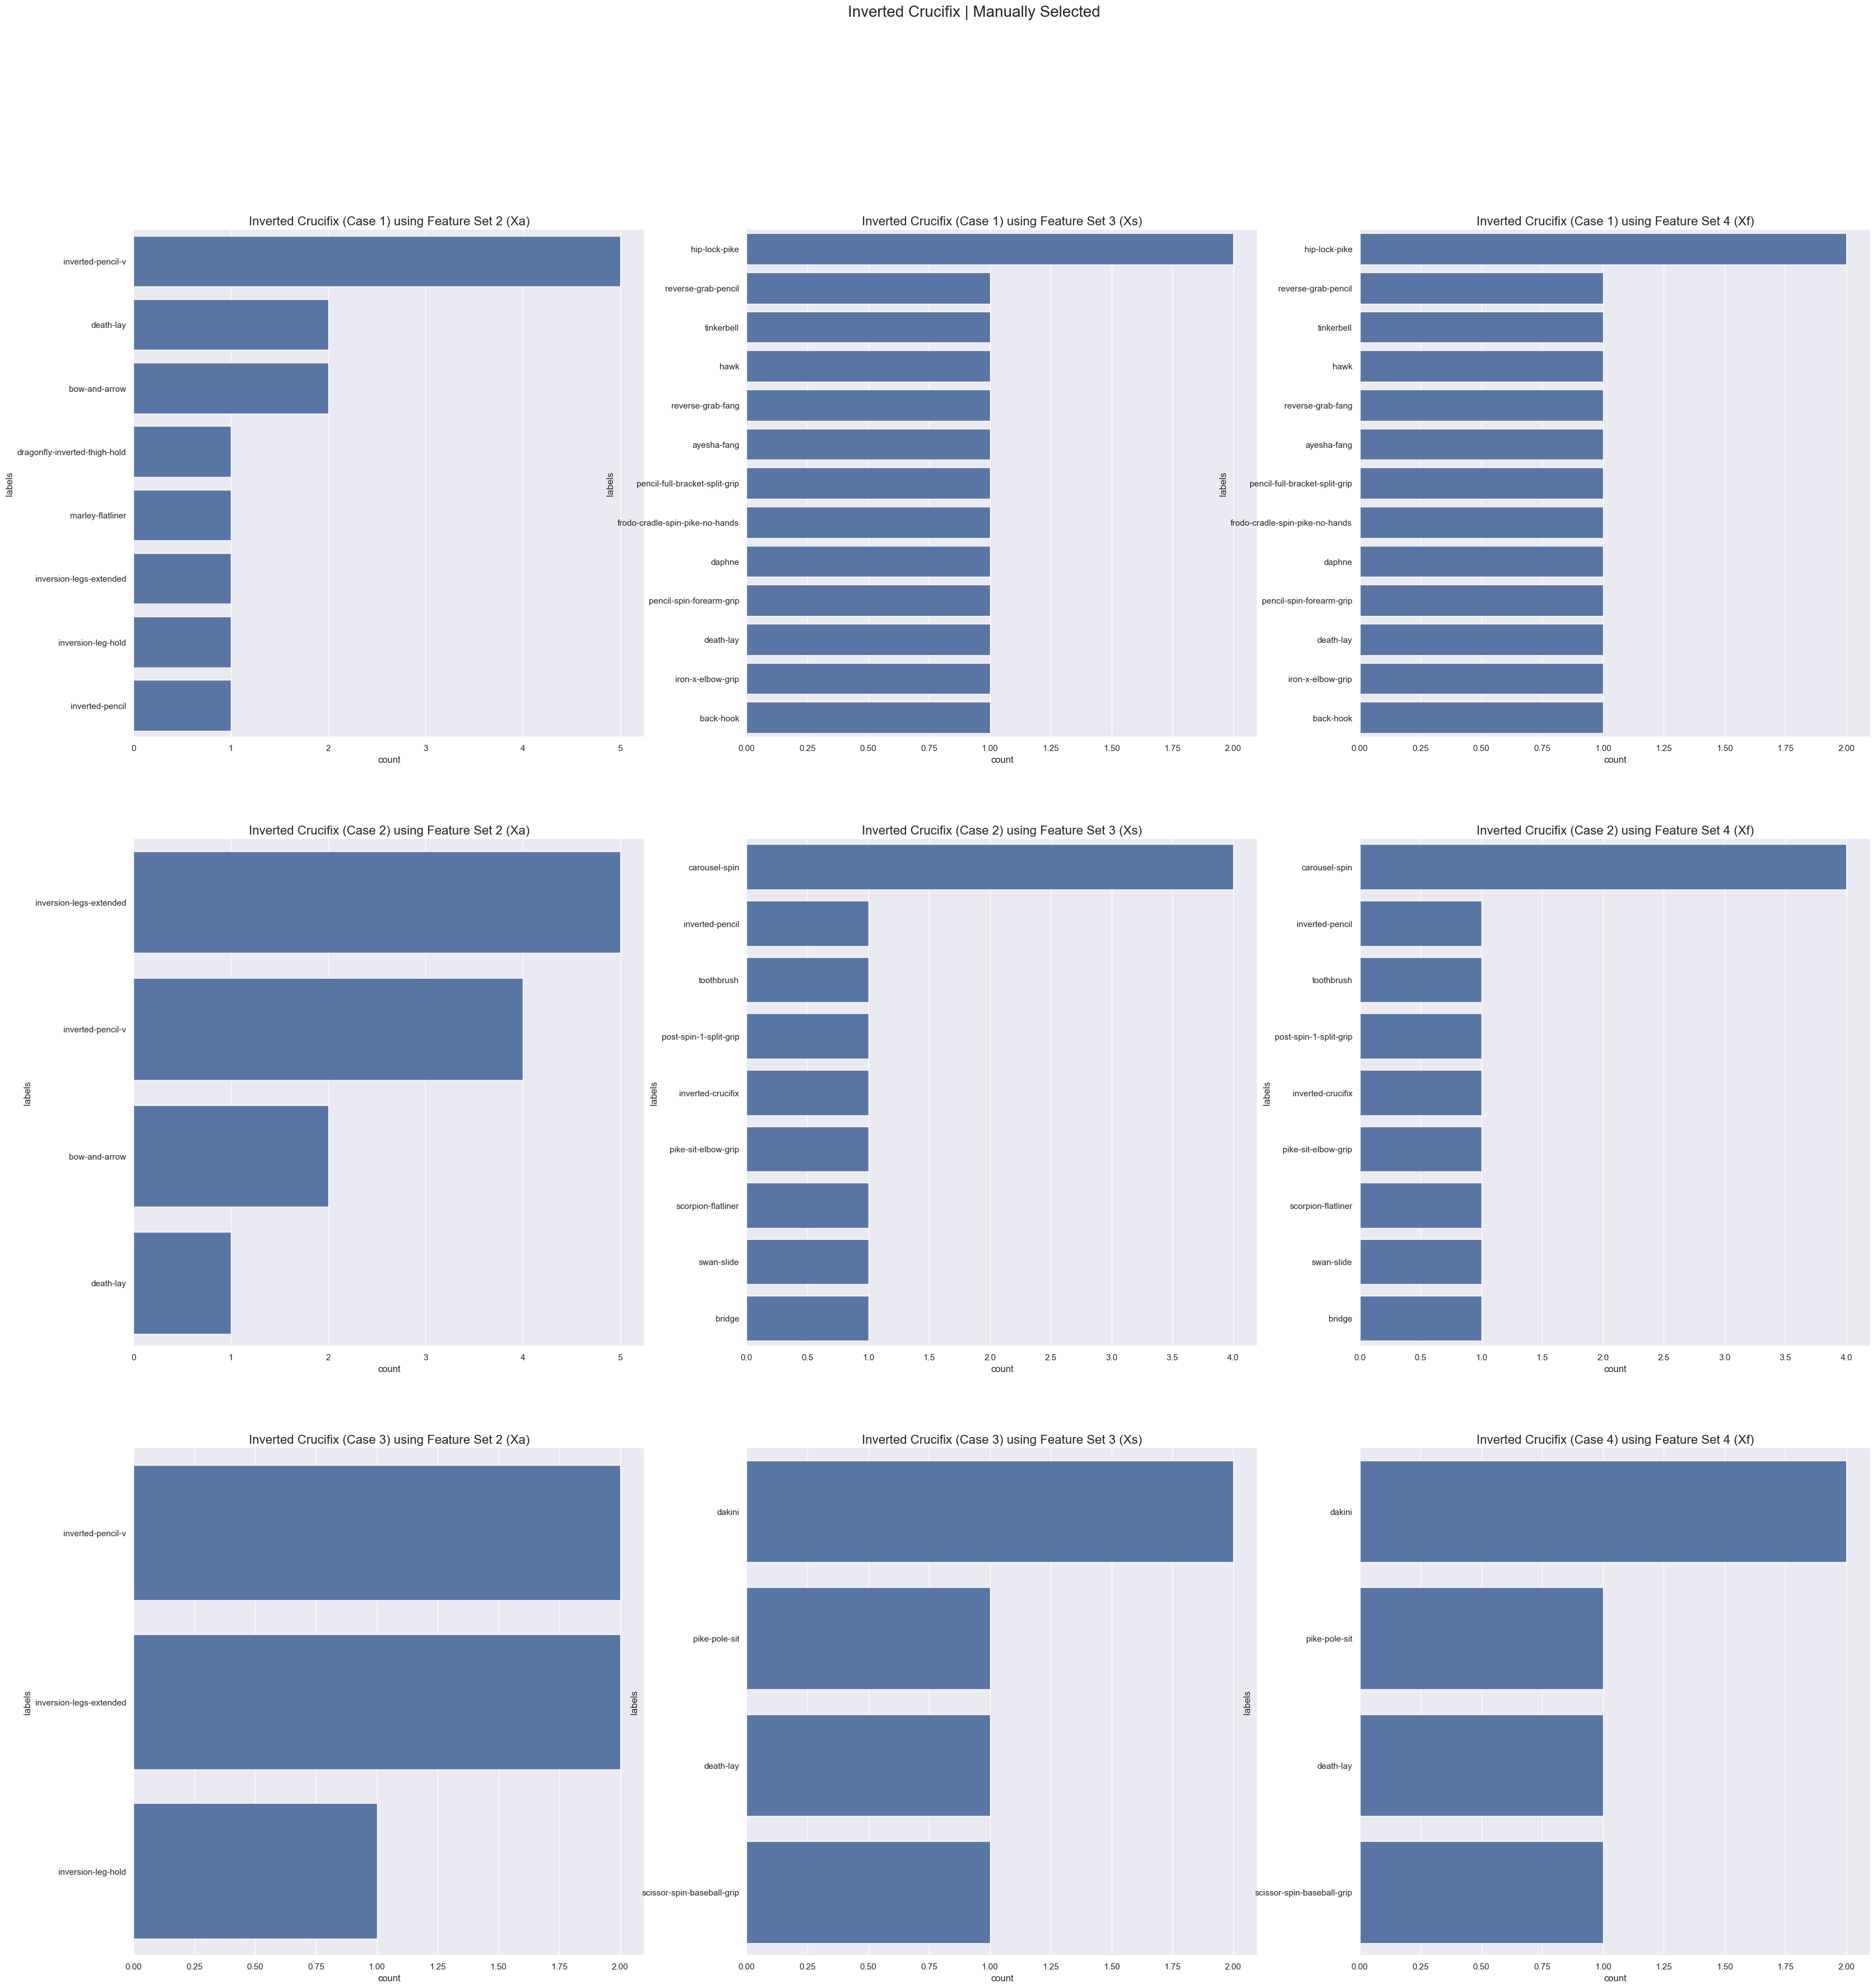

In [254]:
feature_selection = 'Manually Selected'

# Test Case: Xt4
Xa_y_pred1 = Xa_manual_knn.predict(Xt4[Xa_manual_features])
Xa_y_pred1_df = pd.DataFrame(Xa_y_pred1, columns=['labels'])

Xs_y_pred1 = Xs_manual_knn.predict(Xt4[Xs_manual_features])
Xs_y_pred1_df = pd.DataFrame(Xs_y_pred1, columns=['labels'])

Xf_y_pred1 = Xf_manual_knn.predict(Xt4[Xf_manual_features])
Xf_y_pred1_df = pd.DataFrame(Xf_y_pred1, columns=['labels'])

# Test Case: Xt5
Xa_y_pred2 = Xa_manual_knn.predict(Xt5[Xa_manual_features])
Xa_y_pred2_df = pd.DataFrame(Xa_y_pred2, columns=['labels'])

Xs_y_pred2 = Xs_manual_knn.predict(Xt5[Xs_manual_features])
Xs_y_pred2_df = pd.DataFrame(Xs_y_pred2, columns=['labels'])

Xf_y_pred2 = Xf_manual_knn.predict(Xt5[Xf_manual_features])
Xf_y_pred2_df = pd.DataFrame(Xf_y_pred2, columns=['labels'])

# Test Case: Xt6
Xa_y_pred3 = Xa_manual_knn.predict(Xt6[Xa_manual_features])
Xa_y_pred3_df = pd.DataFrame(Xa_y_pred3, columns=['labels'])

Xs_y_pred3 = Xs_manual_knn.predict(Xt6[Xs_manual_features])
Xs_y_pred3_df = pd.DataFrame(Xs_y_pred3, columns=['labels'])

Xf_y_pred3 = Xf_manual_knn.predict(Xt6[Xf_manual_features])
Xf_y_pred3_df = pd.DataFrame(Xf_y_pred3, columns=['labels'])

fig, axs = plt.subplots(3, 3, figsize=(40, 40))
fig.suptitle(f'{test_category} | {feature_selection}', fontsize=20)

axs[0,0].set_title(f'{test_category} (Case 1) using Feature Set 2 (Xa)', fontsize=16)
axs[0,1].set_title(f'{test_category} (Case 1) using Feature Set 3 (Xs)', fontsize=16)
axs[0,2].set_title(f'{test_category} (Case 1) using Feature Set 4 (Xf)', fontsize=16)
axs[1,0].set_title(f'{test_category} (Case 2) using Feature Set 2 (Xa)', fontsize=16)
axs[1,1].set_title(f'{test_category} (Case 2) using Feature Set 3 (Xs)', fontsize=16)
axs[1,2].set_title(f'{test_category} (Case 2) using Feature Set 4 (Xf)', fontsize=16)
axs[2,0].set_title(f'{test_category} (Case 3) using Feature Set 2 (Xa)', fontsize=16)
axs[2,1].set_title(f'{test_category} (Case 3) using Feature Set 3 (Xs)', fontsize=16)
axs[2,2].set_title(f'{test_category} (Case 4) using Feature Set 4 (Xf)', fontsize=16)

sns.countplot(data=Xa_y_pred1_df, y='labels', order=Xa_y_pred1_df['labels'].value_counts().index, ax=axs[0,0])
sns.countplot(data=Xs_y_pred1_df, y='labels', order=Xs_y_pred1_df['labels'].value_counts().index, ax=axs[0,1])
sns.countplot(data=Xf_y_pred1_df, y='labels', order=Xf_y_pred1_df['labels'].value_counts().index, ax=axs[0,2])
sns.countplot(data=Xa_y_pred2_df, y='labels', order=Xa_y_pred2_df['labels'].value_counts().index, ax=axs[1,0])
sns.countplot(data=Xs_y_pred2_df, y='labels', order=Xs_y_pred2_df['labels'].value_counts().index, ax=axs[1,1])
sns.countplot(data=Xf_y_pred2_df, y='labels', order=Xf_y_pred2_df['labels'].value_counts().index, ax=axs[1,2])
sns.countplot(data=Xa_y_pred3_df, y='labels', order=Xa_y_pred3_df['labels'].value_counts().index, ax=axs[2,0])
sns.countplot(data=Xs_y_pred3_df, y='labels', order=Xs_y_pred3_df['labels'].value_counts().index, ax=axs[2,1])
sns.countplot(data=Xf_y_pred3_df, y='labels', order=Xf_y_pred3_df['labels'].value_counts().index, ax=axs[2,2])

### Test Category: Brass Monkey

<Axes: title={'center': 'Brass Monkey (Case 4) using Feature Set 4 (Xf)'}, xlabel='count', ylabel='labels'>

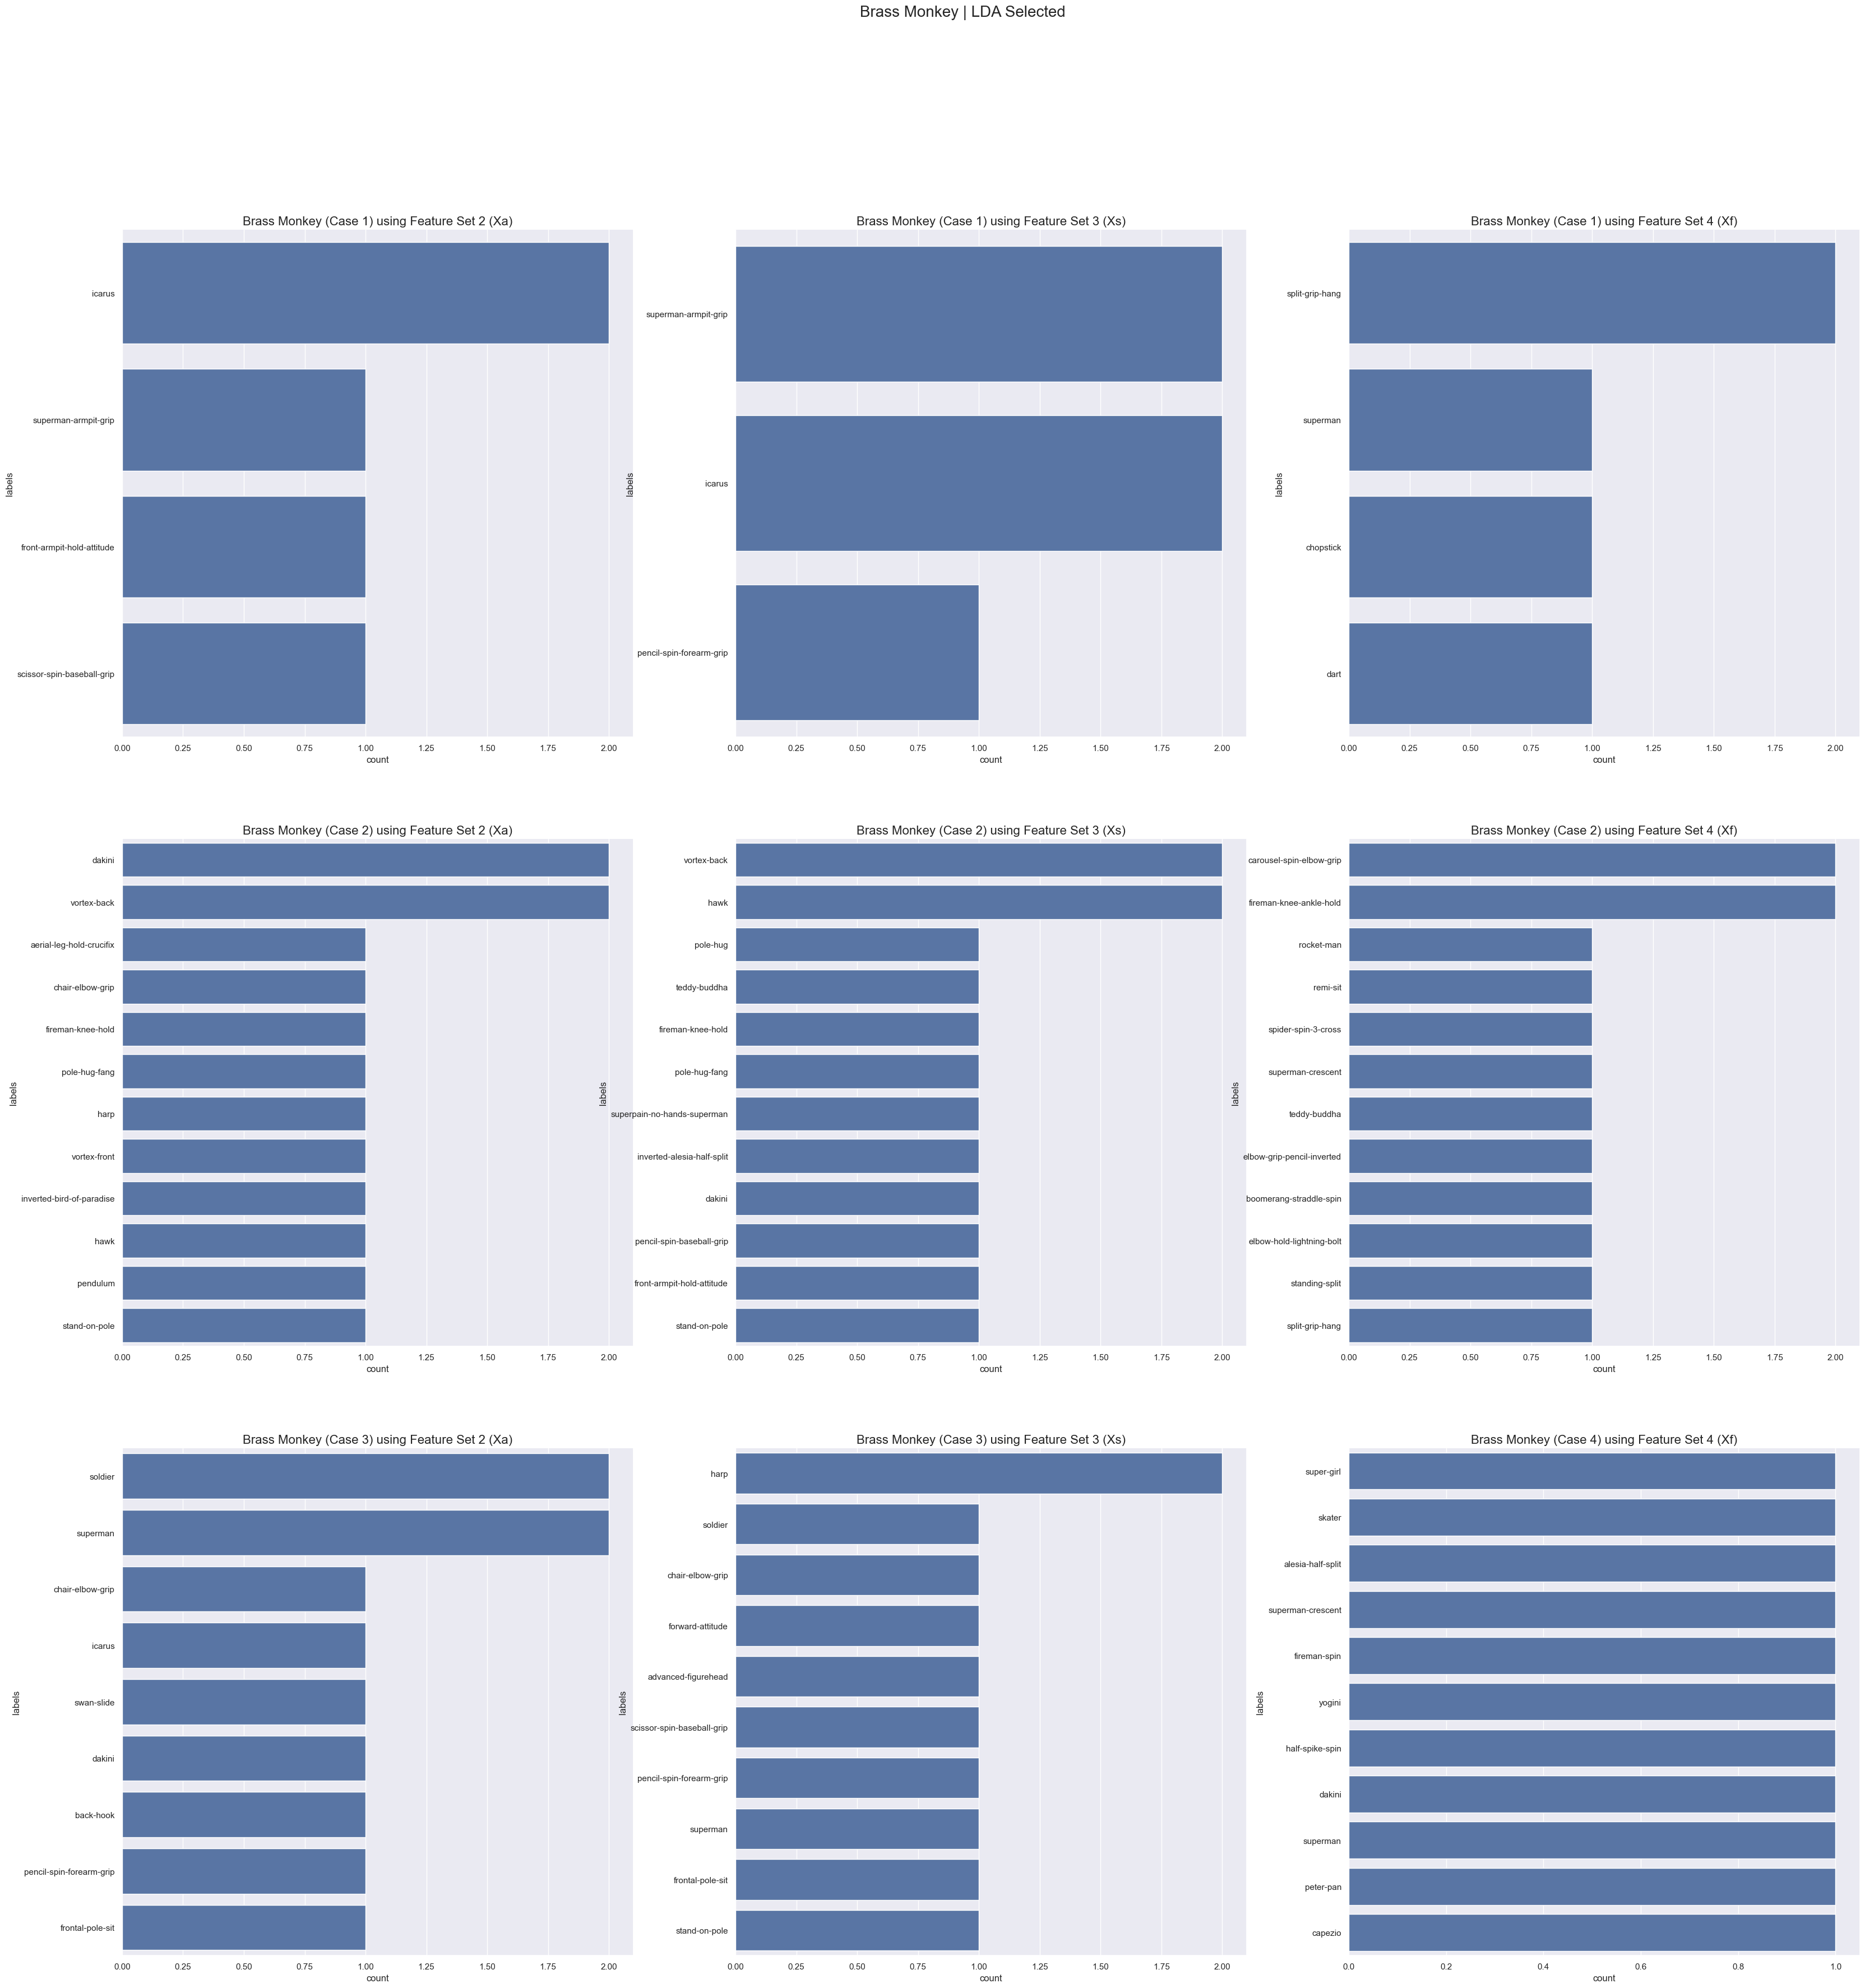

In [256]:
test_category = 'Brass Monkey'
feature_selection = 'LDA Selected'

# Test Case: Xt7
Xa_y_pred1 = Xa_lda_knn.predict(Xt7[Xa_important_features])
Xa_y_pred1_df = pd.DataFrame(Xa_y_pred1, columns=['labels'])

Xs_y_pred1 = Xs_lda_knn.predict(Xt7[Xs_important_features])
Xs_y_pred1_df = pd.DataFrame(Xs_y_pred1, columns=['labels'])

Xf_y_pred1 = Xf_lda_knn.predict(Xt7[Xf_important_features])
Xf_y_pred1_df = pd.DataFrame(Xf_y_pred1, columns=['labels'])

# Test Case: Xt8
Xa_y_pred2 = Xa_lda_knn.predict(Xt8[Xa_important_features])
Xa_y_pred2_df = pd.DataFrame(Xa_y_pred2, columns=['labels'])

Xs_y_pred2 = Xs_lda_knn.predict(Xt8[Xs_important_features])
Xs_y_pred2_df = pd.DataFrame(Xs_y_pred2, columns=['labels'])

Xf_y_pred2 = Xf_lda_knn.predict(Xt8[Xf_important_features])
Xf_y_pred2_df = pd.DataFrame(Xf_y_pred2, columns=['labels'])

# Test Case: Xt9
Xa_y_pred3 = Xa_lda_knn.predict(Xt9[Xa_important_features])
Xa_y_pred3_df = pd.DataFrame(Xa_y_pred3, columns=['labels'])

Xs_y_pred3 = Xs_lda_knn.predict(Xt9[Xs_important_features])
Xs_y_pred3_df = pd.DataFrame(Xs_y_pred3, columns=['labels'])

Xf_y_pred3 = Xf_lda_knn.predict(Xt9[Xf_important_features])
Xf_y_pred3_df = pd.DataFrame(Xf_y_pred3, columns=['labels'])

fig, axs = plt.subplots(3, 3, figsize=(40, 40))
fig.suptitle(f'{test_category} | {feature_selection}', fontsize=20)

axs[0,0].set_title(f'{test_category} (Case 1) using Feature Set 2 (Xa)', fontsize=16)
axs[0,1].set_title(f'{test_category} (Case 1) using Feature Set 3 (Xs)', fontsize=16)
axs[0,2].set_title(f'{test_category} (Case 1) using Feature Set 4 (Xf)', fontsize=16)
axs[1,0].set_title(f'{test_category} (Case 2) using Feature Set 2 (Xa)', fontsize=16)
axs[1,1].set_title(f'{test_category} (Case 2) using Feature Set 3 (Xs)', fontsize=16)
axs[1,2].set_title(f'{test_category} (Case 2) using Feature Set 4 (Xf)', fontsize=16)
axs[2,0].set_title(f'{test_category} (Case 3) using Feature Set 2 (Xa)', fontsize=16)
axs[2,1].set_title(f'{test_category} (Case 3) using Feature Set 3 (Xs)', fontsize=16)
axs[2,2].set_title(f'{test_category} (Case 4) using Feature Set 4 (Xf)', fontsize=16)

sns.countplot(data=Xa_y_pred1_df, y='labels', order=Xa_y_pred1_df['labels'].value_counts().index, ax=axs[0,0])
sns.countplot(data=Xs_y_pred1_df, y='labels', order=Xs_y_pred1_df['labels'].value_counts().index, ax=axs[0,1])
sns.countplot(data=Xf_y_pred1_df, y='labels', order=Xf_y_pred1_df['labels'].value_counts().index, ax=axs[0,2])
sns.countplot(data=Xa_y_pred2_df, y='labels', order=Xa_y_pred2_df['labels'].value_counts().index, ax=axs[1,0])
sns.countplot(data=Xs_y_pred2_df, y='labels', order=Xs_y_pred2_df['labels'].value_counts().index, ax=axs[1,1])
sns.countplot(data=Xf_y_pred2_df, y='labels', order=Xf_y_pred2_df['labels'].value_counts().index, ax=axs[1,2])
sns.countplot(data=Xa_y_pred3_df, y='labels', order=Xa_y_pred3_df['labels'].value_counts().index, ax=axs[2,0])
sns.countplot(data=Xs_y_pred3_df, y='labels', order=Xs_y_pred3_df['labels'].value_counts().index, ax=axs[2,1])
sns.countplot(data=Xf_y_pred3_df, y='labels', order=Xf_y_pred3_df['labels'].value_counts().index, ax=axs[2,2])

<Axes: title={'center': 'Brass Monkey (Case 4) using Feature Set 4 (Xf)'}, xlabel='count', ylabel='labels'>

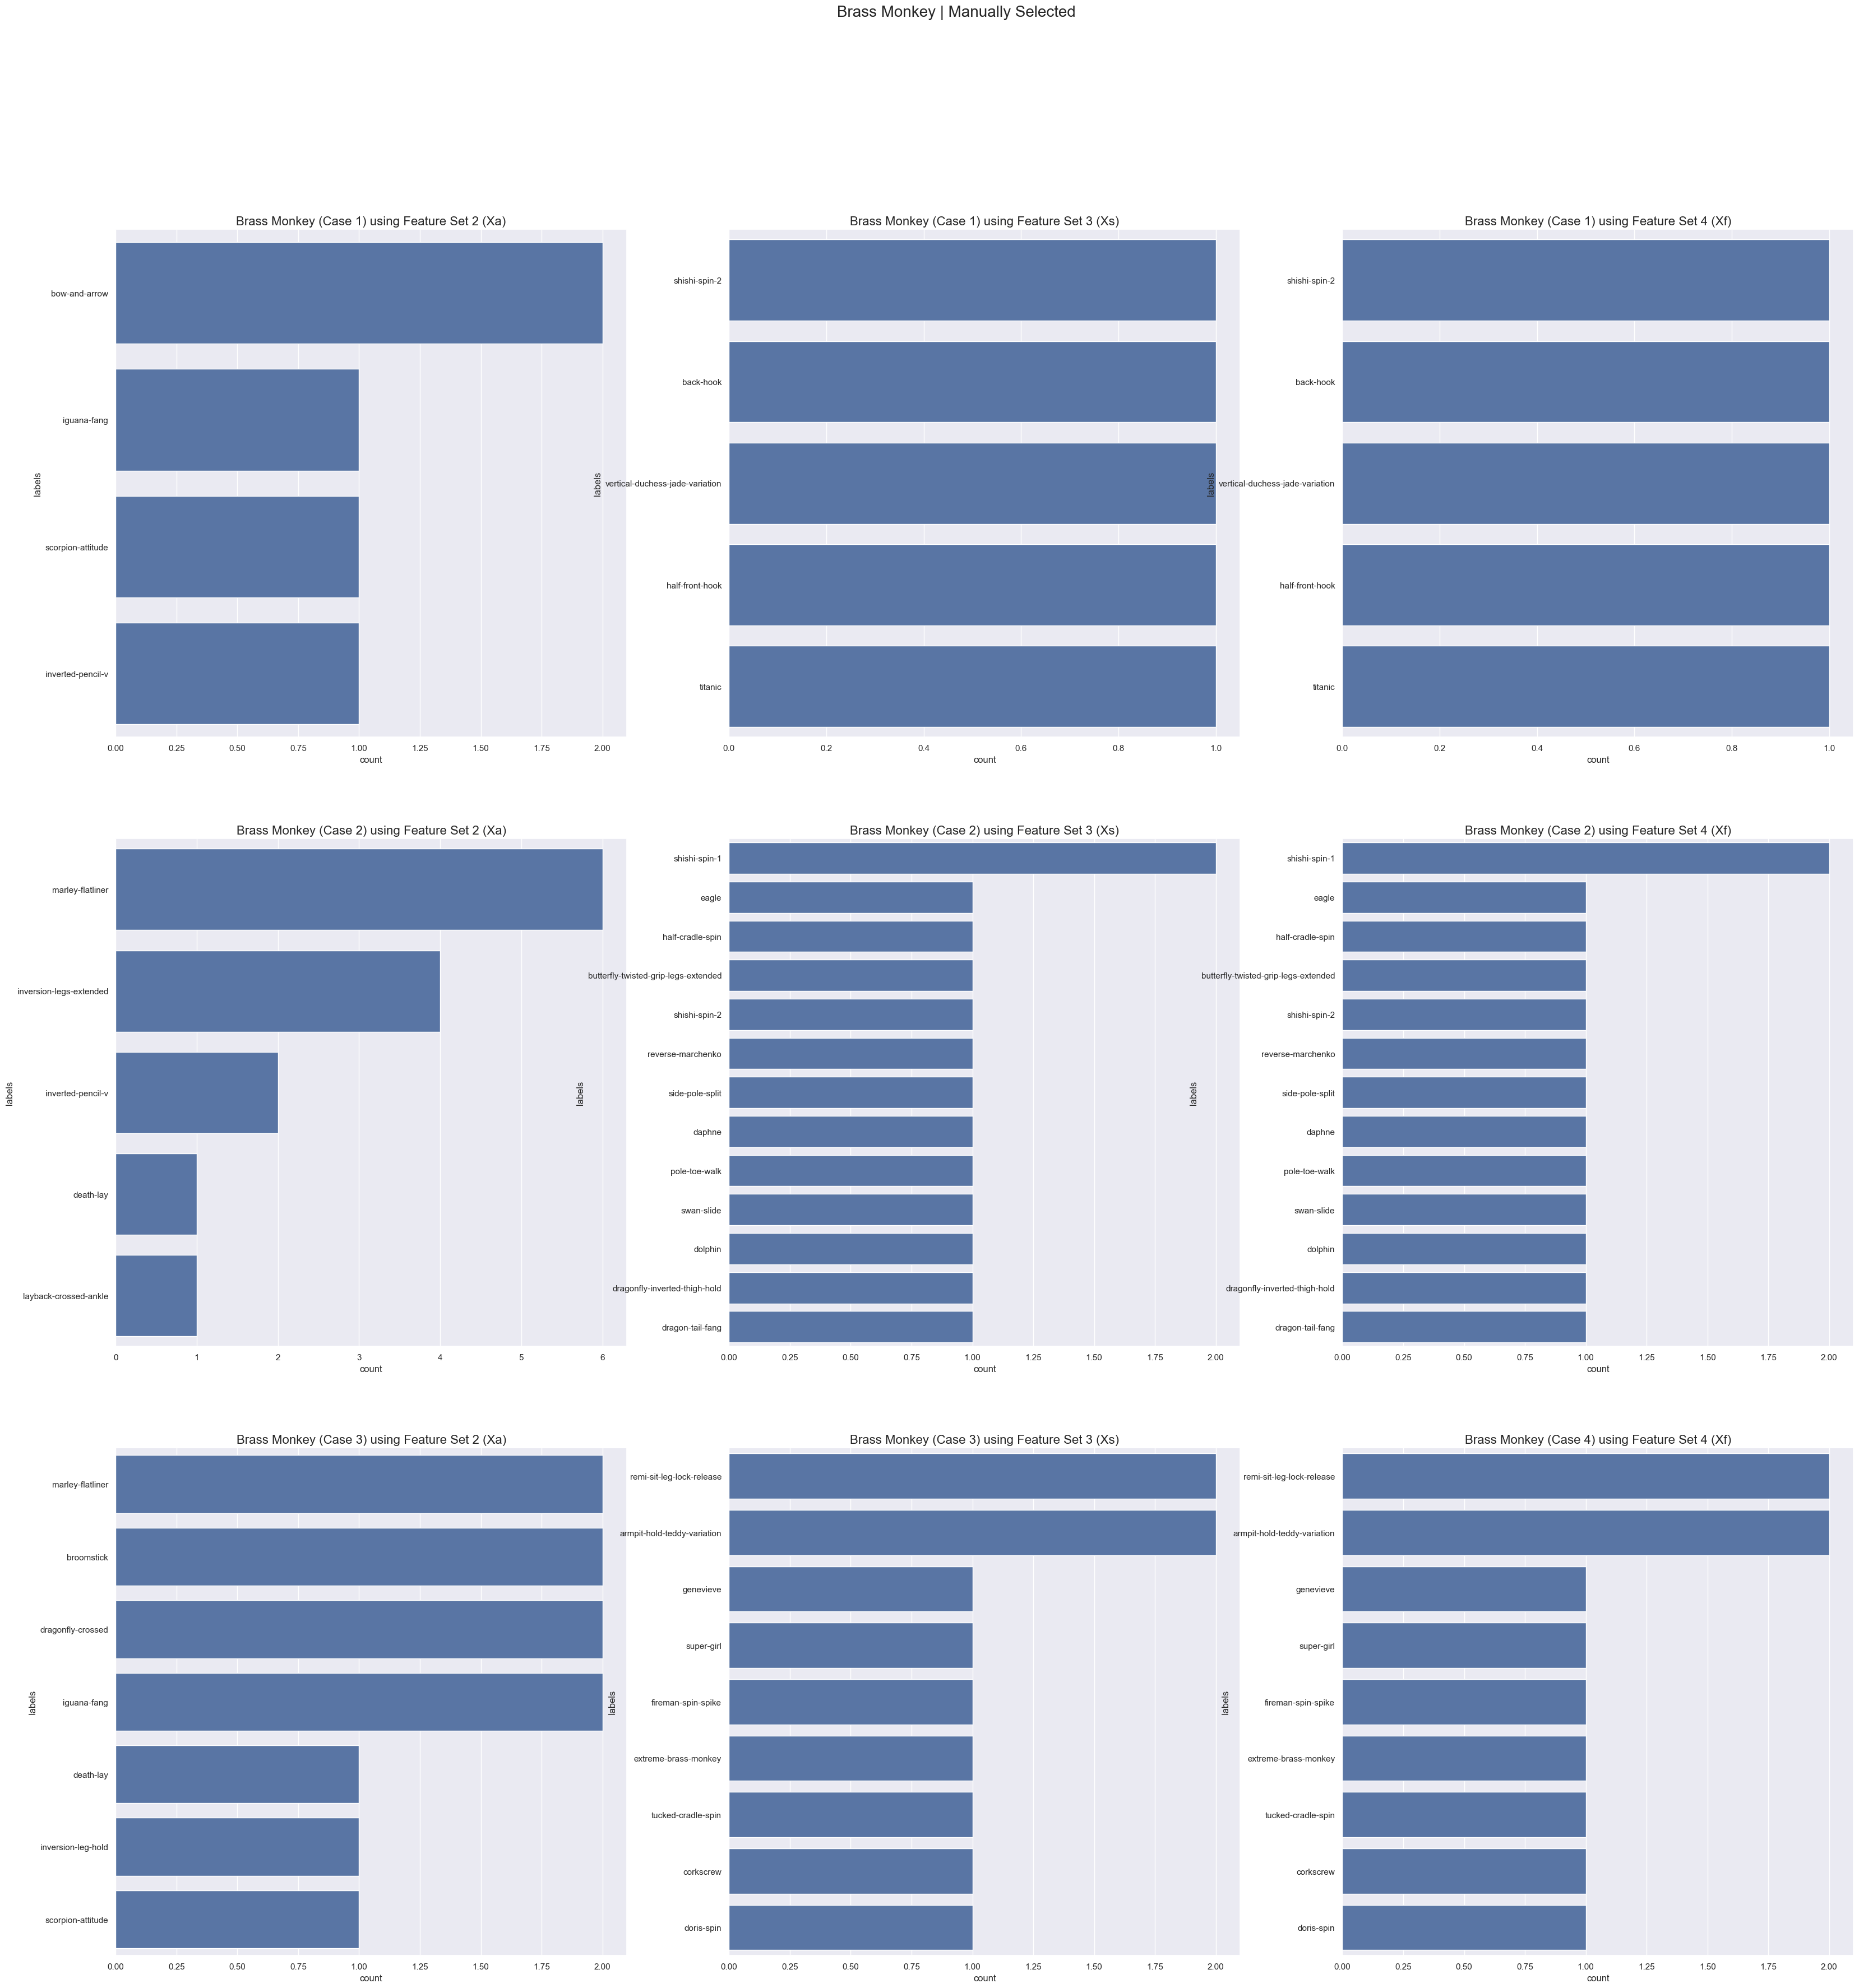

In [218]:
feature_selection = 'Manually Selected'

# Test Case: Xt7
Xa_y_pred1 = Xa_manual_knn.predict(Xt7[Xa_manual_features])
Xa_y_pred1_df = pd.DataFrame(Xa_y_pred1, columns=['labels'])
Xs_y_pred1 = Xs_manual_knn.predict(Xt7[Xs_manual_features])
Xs_y_pred1_df = pd.DataFrame(Xs_y_pred1, columns=['labels'])
Xf_y_pred1 = Xf_manual_knn.predict(Xt7[Xf_manual_features])
Xf_y_pred1_df = pd.DataFrame(Xf_y_pred1, columns=['labels'])

# Test Case: Xt8
Xa_y_pred2 = Xa_manual_knn.predict(Xt8[Xa_manual_features])
Xa_y_pred2_df = pd.DataFrame(Xa_y_pred2, columns=['labels'])
Xs_y_pred2 = Xs_manual_knn.predict(Xt8[Xs_manual_features])
Xs_y_pred2_df = pd.DataFrame(Xs_y_pred2, columns=['labels'])
Xf_y_pred2 = Xf_manual_knn.predict(Xt8[Xf_manual_features])
Xf_y_pred2_df = pd.DataFrame(Xf_y_pred2, columns=['labels'])

# Test Case: Xt9
Xa_y_pred3 = Xa_manual_knn.predict(Xt9[Xa_manual_features])
Xa_y_pred3_df = pd.DataFrame(Xa_y_pred3, columns=['labels'])
Xs_y_pred3 = Xs_manual_knn.predict(Xt9[Xs_manual_features])
Xs_y_pred3_df = pd.DataFrame(Xs_y_pred3, columns=['labels'])
Xf_y_pred3 = Xf_manual_knn.predict(Xt9[Xf_manual_features])
Xf_y_pred3_df = pd.DataFrame(Xf_y_pred3, columns=['labels'])

fig, axs = plt.subplots(3, 3, figsize=(40, 40))
fig.suptitle(f'{test_category} | {feature_selection}', fontsize=20)

axs[0,0].set_title(f'{test_category} (Case 1) using Feature Set 2 (Xa)', fontsize=16)
axs[0,1].set_title(f'{test_category} (Case 1) using Feature Set 3 (Xs)', fontsize=16)
axs[0,2].set_title(f'{test_category} (Case 1) using Feature Set 4 (Xf)', fontsize=16)
axs[1,0].set_title(f'{test_category} (Case 2) using Feature Set 2 (Xa)', fontsize=16)
axs[1,1].set_title(f'{test_category} (Case 2) using Feature Set 3 (Xs)', fontsize=16)
axs[1,2].set_title(f'{test_category} (Case 2) using Feature Set 4 (Xf)', fontsize=16)
axs[2,0].set_title(f'{test_category} (Case 3) using Feature Set 2 (Xa)', fontsize=16)
axs[2,1].set_title(f'{test_category} (Case 3) using Feature Set 3 (Xs)', fontsize=16)
axs[2,2].set_title(f'{test_category} (Case 4) using Feature Set 4 (Xf)', fontsize=16)

sns.countplot(data=Xa_y_pred1_df, y='labels', order=Xa_y_pred1_df['labels'].value_counts().index, ax=axs[0,0])
sns.countplot(data=Xs_y_pred1_df, y='labels', order=Xs_y_pred1_df['labels'].value_counts().index, ax=axs[0,1])
sns.countplot(data=Xf_y_pred1_df, y='labels', order=Xf_y_pred1_df['labels'].value_counts().index, ax=axs[0,2])
sns.countplot(data=Xa_y_pred2_df, y='labels', order=Xa_y_pred2_df['labels'].value_counts().index, ax=axs[1,0])
sns.countplot(data=Xs_y_pred2_df, y='labels', order=Xs_y_pred2_df['labels'].value_counts().index, ax=axs[1,1])
sns.countplot(data=Xf_y_pred2_df, y='labels', order=Xf_y_pred2_df['labels'].value_counts().index, ax=axs[1,2])
sns.countplot(data=Xa_y_pred3_df, y='labels', order=Xa_y_pred3_df['labels'].value_counts().index, ax=axs[2,0])
sns.countplot(data=Xs_y_pred3_df, y='labels', order=Xs_y_pred3_df['labels'].value_counts().index, ax=axs[2,1])
sns.countplot(data=Xf_y_pred3_df, y='labels', order=Xf_y_pred3_df['labels'].value_counts().index, ax=axs[2,2])